<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_951-1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1897]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1898]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [10:46:02] SMILES Parse Error: syntax error while parsing: ,C[C@H](Cc1ccc2c(c1)OC(C(=O)O)(C(=O)O)O2)NC[C@H](O)c1cccc(Cl)c1
RDKit ERROR: [10:46:02] SMILES Parse Error: Failed parsing SMILES ',C[C@H](Cc1ccc2c(c1)OC(C(=O)O)(C(=O)O)O2)NC[C@H](O)c1cccc(Cl)c1' for input: ',C[C@H](Cc1ccc2c(c1)OC(C(=O)O)(C(=O)O)O2)NC[C@H](O)c1cccc(Cl)c1'


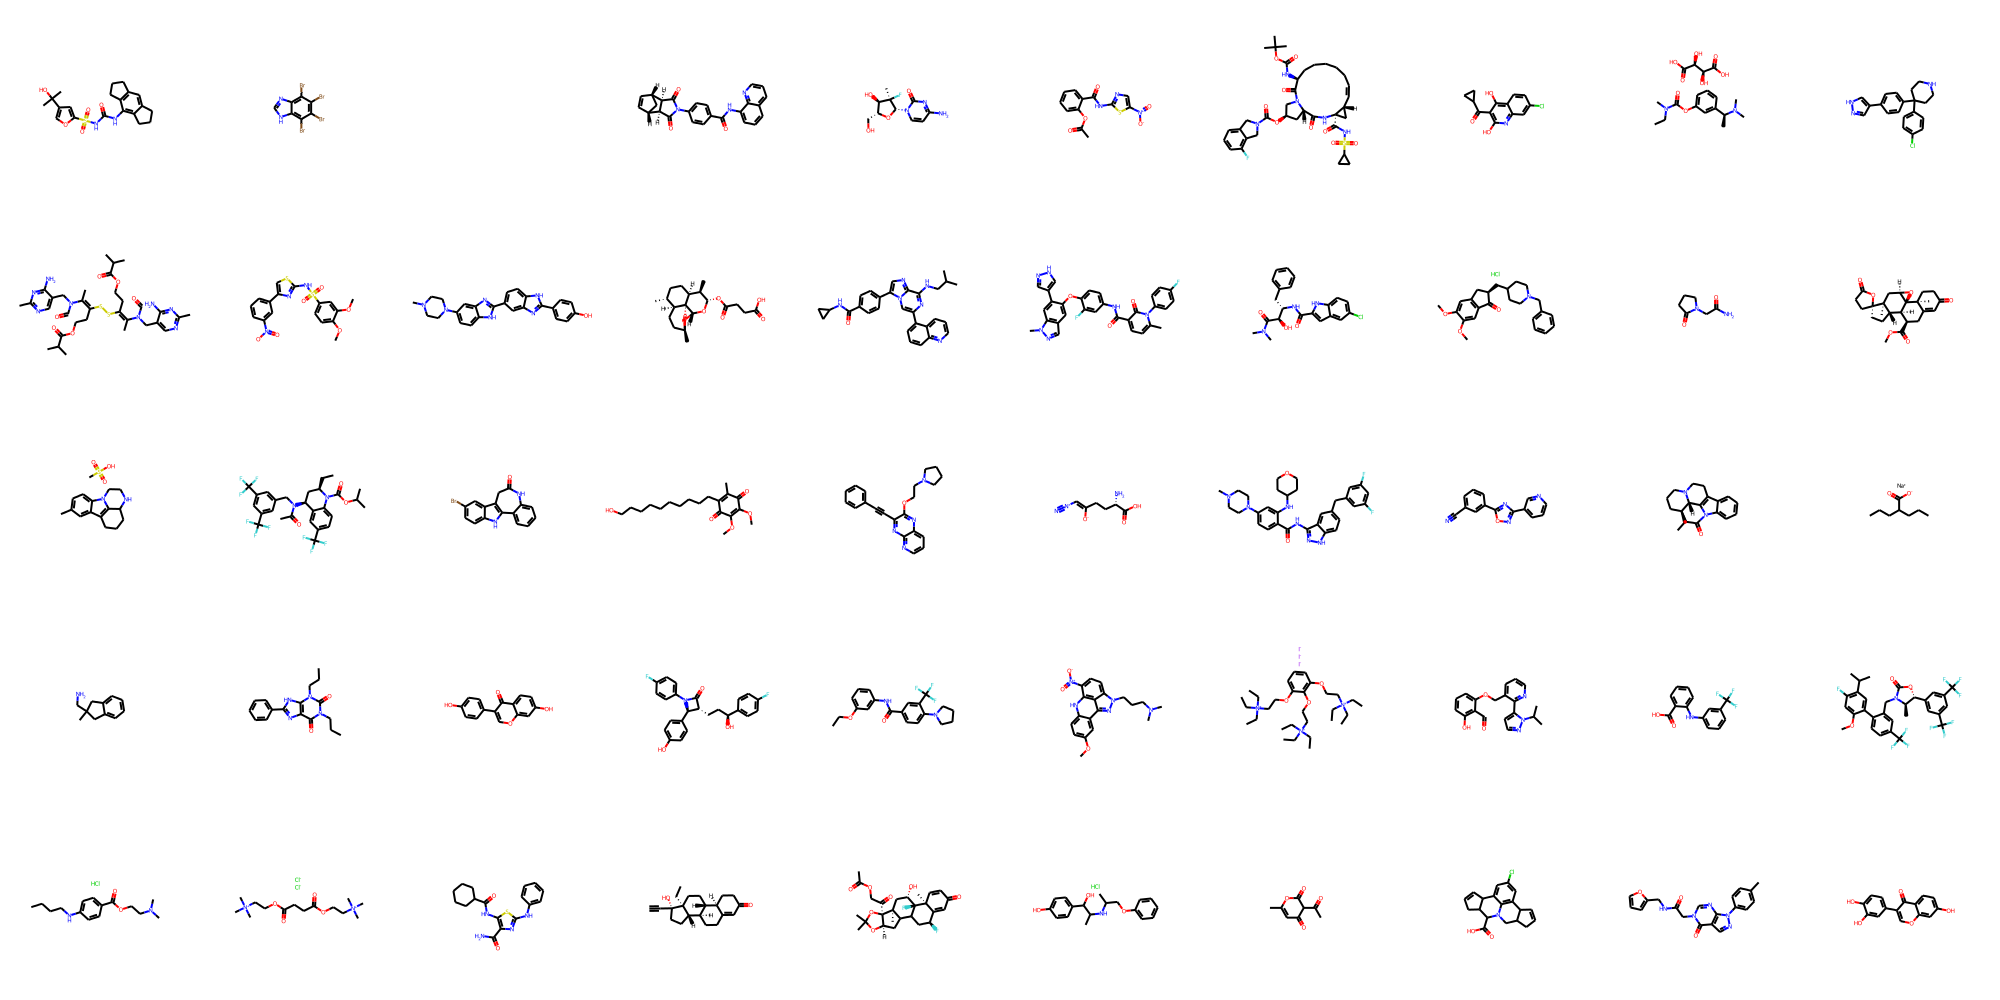

In [1899]:
smiles_list = [

'CC(C)(O)c1coc(S(=O)(=O)NC(=O)Nc2c3c(cc4c2CCC4)CCC3)c1',
'Brc1c(Br)c(Br)c2[nH]cnc2c1Br',
',C[C@H](Cc1ccc2c(c1)OC(C(=O)O)(C(=O)O)O2)NC[C@H](O)c1cccc(Cl)c1',
'O=C(Nc1cccc2cccnc12)c1ccc(N2C(=O)[C@H]3[C@@H]4C=C[C@@H](C4)[C@H]3C2=O)cc1',
'C[C@@]1(F)[C@H](O)[C@@H](CO)O[C@H]1n1ccc(N)nc1=O',
'CC(=O)Oc1ccccc1C(=O)Nc1ncc([N+](=O)[O-])s1',
'CC(C)(C)OC(=O)N[C@H]1CCCCC/C=C\[C@@H]2C[C@@]2(C(=O)NS(=O)(=O)C2CC2)NC(=O)[C@@H]2C[C@@H](OC(=O)N3Cc4cccc(F)c4C3)CN2C1=O',
'O=C(c1c(O)nc2cc(Cl)ccc2c1O)C1CC1',
'CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1.O=C(O)[C@@H](O)[C@H](O)C(=O)O',
'Clc1ccc(C2(c3ccc(-c4cn[nH]c4)cc3)CCNCC2)cc1',
'C/C(=C(/CCOC(=O)C(C)C)SS/C(CCOC(=O)C(C)C)=C(\C)N(C=O)Cc1cnc(C)nc1N)N(C=O)Cc1cnc(C)nc1N',
'COc1ccc(S(=O)(=O)Nc2nc(-c3cccc([N+](=O)[O-])c3)cs2)cc1OC',
'CN1CCN(c2ccc3[nH]c(-c4ccc5[nH]c(-c6ccc(O)cc6)nc5c4)nc3c2)CC1',
'C[C@@H]1CC[C@H]2[C@@H](C)[C@H](OC(=O)CCC(=O)O)O[C@@H]3O[C@@]4(C)CC[C@@H]1[C@@]23OO4',
'CC(C)CNc1nc(-c2cccc3ncccc23)cn2c(-c3ccc(C(=O)NC4CC4)cc3)cnc12',
'Cc1ccc(C(=O)Nc2ccc(Oc3cc4cnn(C)c4cc3-c3cn[nH]c3)c(F)c2)c(=O)n1-c1ccc(F)cc1',
'CN(C)C(=O)[C@H](O)[C@H](Cc1ccccc1)NC(=O)c1cc2cc(Cl)ccc2[nH]1',
'COc1cc2c(cc1OC)C(=O)[C@H](CC1CCN(Cc3ccccc3)CC1)C2.Cl',
'NC(=O)CN1CCCC1=O',
'COC(=O)[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@@]23O[C@@H]2C[C@@]2(C)[C@@H](CC[C@@]24CCC(=O)O4)[C@H]13',
'CS(=O)(=O)O.Cc1ccc2c(c1)c1c3n2CCNC3CCC1',
'CC[C@@H]1C[C@H](N(Cc2cc(C(F)(F)F)cc(C(F)(F)F)c2)C(C)=O)c2cc(C(F)(F)F)ccc2N1C(=O)OC(C)C',
'O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1',
'COC1=C(OC)C(=O)C(CCCCCCCCCCO)=C(C)C1=O',
'C(#Cc1nc2ncccc2nc1OCCN1CCCC1)c1ccccc1',
'N#[N+]/C=C(\[O-])CC[C@H](N)C(=O)O',
'CN1CCN(c2ccc(C(=O)Nc3n[nH]c4ccc(Cc5cc(F)cc(F)c5)cc34)c(NC3CCOCC3)c2)CC1',
'N#Cc1cccc(-c2nc(-c3cccnc3)no2)c1',
'CC[C@]12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)[C@@H]32',
'CCCC(CCC)C(=O)[O-].[Na+]',
'CC1(CN)Cc2ccccc2C1',
'CCCn1c(=O)c2nc(-c3ccccc3)[nH]c2n(CCC)c1=O',
'O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12',
'O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O)cc2)N1c1ccc(F)cc1',
'CCOc1cccc(NC(=O)c2ccc(N3CCCC3)c(C(F)(F)F)c2)c1',
'COc1ccc2c(c1)-c1nn(CCCN(C)C)c3ccc([N+](=O)[O-])c(c13)N2',
'CC[N+](CC)(CC)CCOc1cccc(OCC[N+](CC)(CC)CC)c1OCC[N+](CC)(CC)CC.[I-].[I-].[I-]',
'CC(C)n1nccc1-c1ncccc1COc1cccc(O)c1C=O',
'O=C(O)c1ccccc1Nc1cccc(C(F)(F)F)c1',
'COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@H]1C',
'CCCCNc1ccc(C(=O)OCCN(C)C)cc1.Cl',
'C[N+](C)(C)CCOC(=O)CCC(=O)OCC[N+](C)(C)C.[Cl-].[Cl-]',
'NC(=O)c1nc(Nc2ccccc2)sc1NC(=O)C1CCCCC1',
'C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@@]21CC',
'CC(=O)OCC(=O)[C@@]12OC(C)(C)O[C@@H]1CC1C3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]12C',
'CC(COc1ccccc1)NC(C)C(O)c1ccc(O)cc1.Cl',
'CC(=O)C1C(=O)C=C(C)OC1=O',
'O=C(O)C1C2CC=CC2c2cc(Cl)cc3c2N1CC1CC=CC31',
'Cc1ccc(-n2ncc3c(=O)n(CC(=O)NCc4ccco4)cnc32)cc1',
'O=c1c(-c2ccc(O)c(O)c2)coc2cc(O)ccc12',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



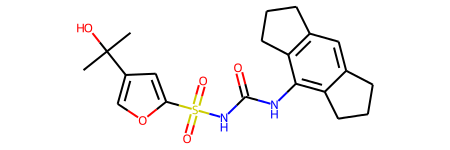

In [1900]:
M1 = mol_list [0]
M1

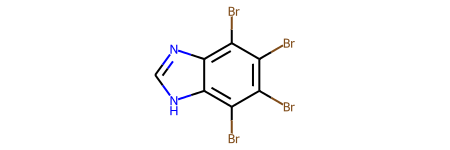

In [1901]:
M2 = mol_list [1]
M2

In [1902]:
M3 = mol_list [2]
M3

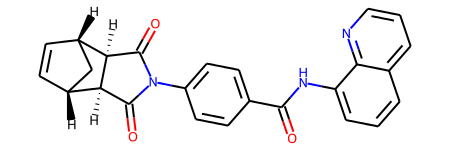

In [1903]:
M4 = mol_list [3]
M4

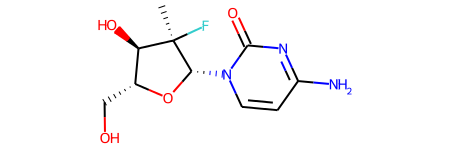

In [1904]:
M5 = mol_list [4]
M5

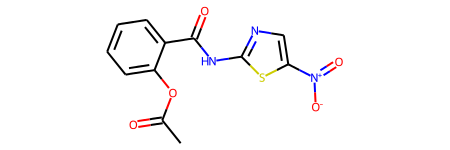

In [1905]:
M6 = mol_list [5]
M6

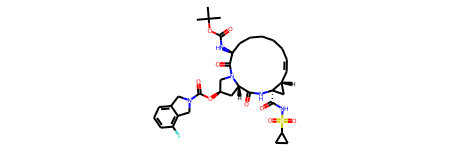

In [1906]:
M7 = mol_list [6]
M7

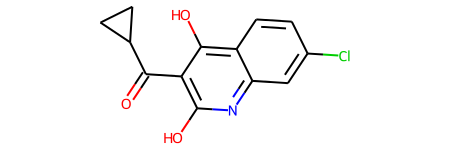

In [1907]:
M8 = mol_list [7]
M8

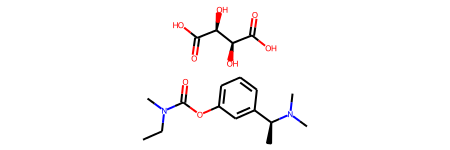

In [1908]:
M9 = mol_list [8]
M9

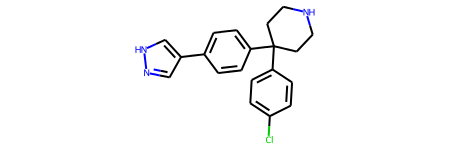

In [1909]:
M10 = mol_list [9]
M10

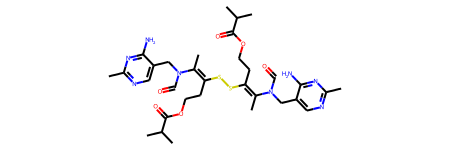

In [1910]:
M11 = mol_list [10]
M11

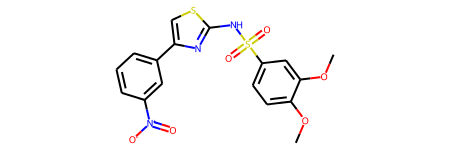

In [1911]:
M12 = mol_list [11]
M12

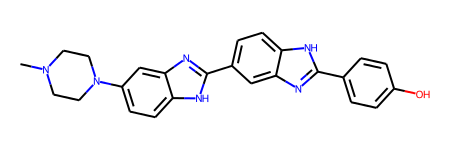

In [1912]:
M13 = mol_list [12]
M13

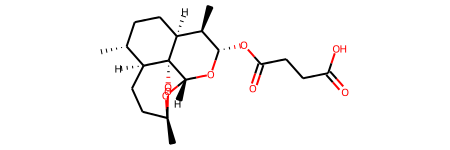

In [1913]:
M14 = mol_list [13]
M14

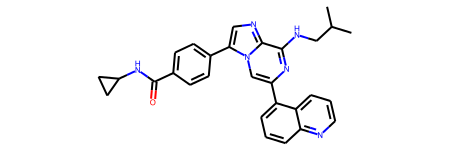

In [1914]:
M15 = mol_list [14]
M15

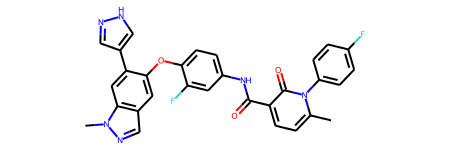

In [1915]:
M16 = mol_list [15]
M16

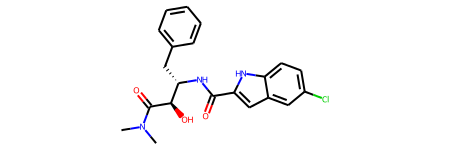

In [1916]:
M17 = mol_list [16]
M17

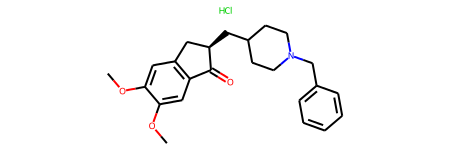

In [1917]:
M18 = mol_list [17]
M18

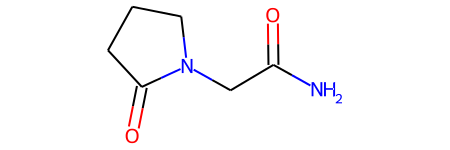

In [1918]:
M19 = mol_list [18]
M19

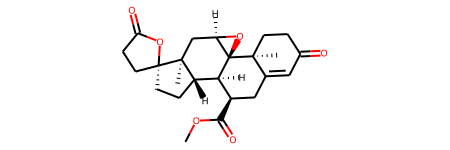

In [1919]:
M20 = mol_list [19]
M20

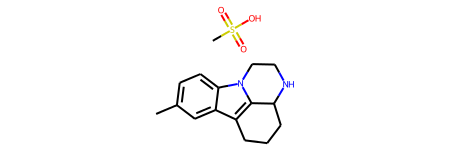

In [1920]:
M21 = mol_list [20]
M21

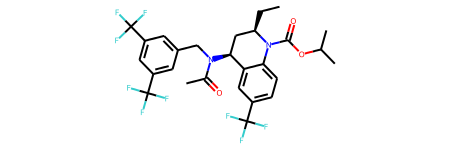

In [1921]:
M22 = mol_list [21]
M22

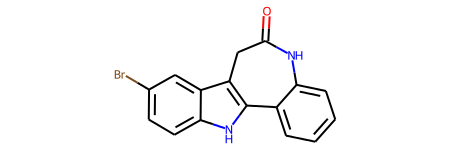

In [1922]:
M23 = mol_list [22]
M23

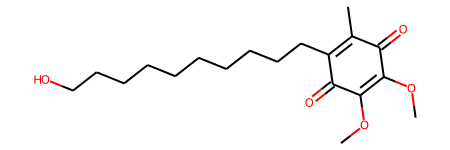

In [1923]:
M24 = mol_list [23]
M24

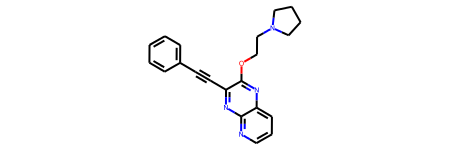

In [1924]:
M25 = mol_list [24]
M25

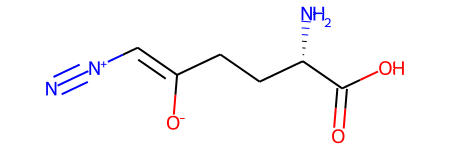

In [1925]:
M26 = mol_list [25]
M26

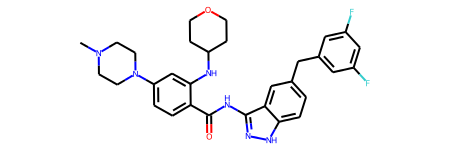

In [1926]:
M27 = mol_list [26]
M27

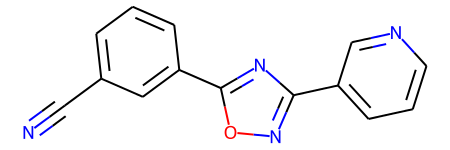

In [1927]:
M28 = mol_list [27]
M28

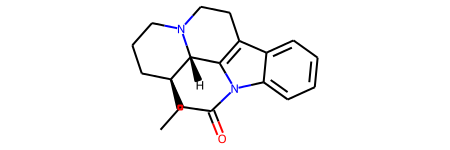

In [1928]:
M29 = mol_list [28]
M29

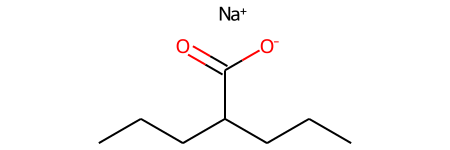

In [1929]:
M30 = mol_list [29]
M30

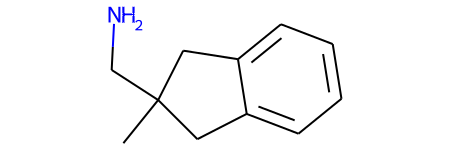

In [1930]:
M31 = mol_list [30]
M31

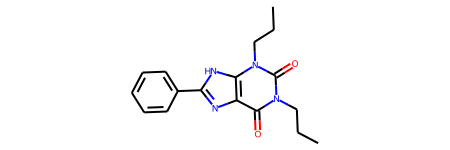

In [1931]:
M32 = mol_list [31]
M32

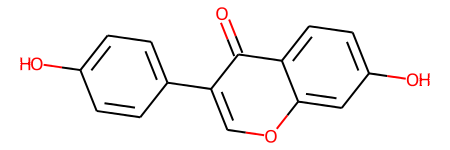

In [1932]:
M33 = mol_list [32]
M33

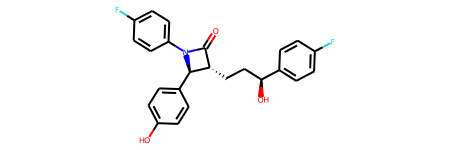

In [1933]:
M34 = mol_list [33]
M34

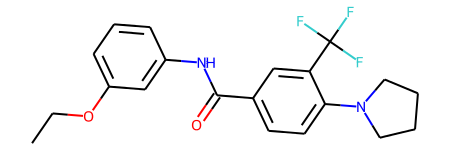

In [1934]:
M35 = mol_list [34]
M35

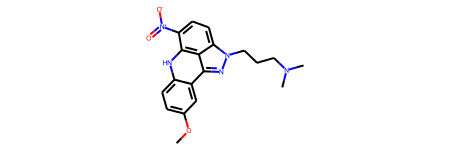

In [1935]:
M36 = mol_list [35]
M36

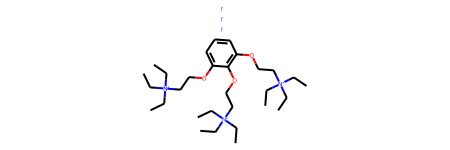

In [1936]:
M37= mol_list [36]
M37

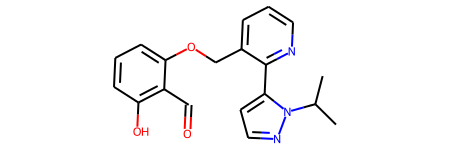

In [1937]:
M38= mol_list [37]
M38

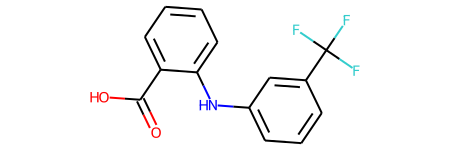

In [1938]:
M39= mol_list [38]
M39

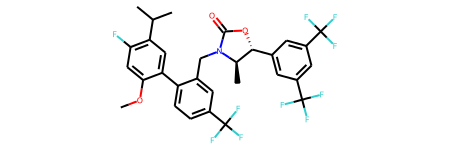

In [1939]:
M40= mol_list [39]
M40

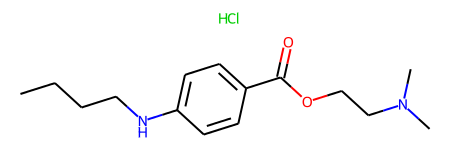

In [1940]:
M41= mol_list [40]
M41

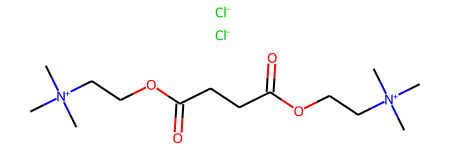

In [1941]:
M42= mol_list [41]
M42

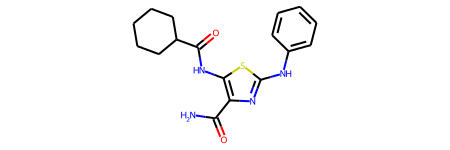

In [1942]:
M43= mol_list [42]
M43

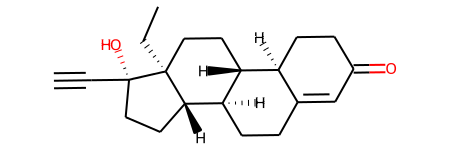

In [1943]:
M44= mol_list [43]
M44

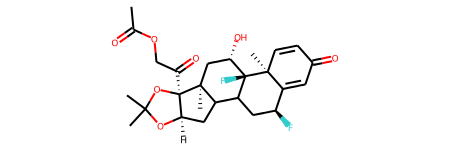

In [1944]:
M45= mol_list [44]
M45

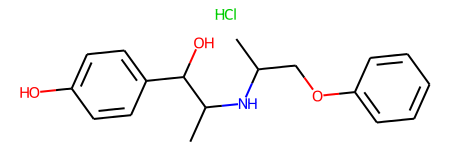

In [1945]:
M46= mol_list [45]
M46

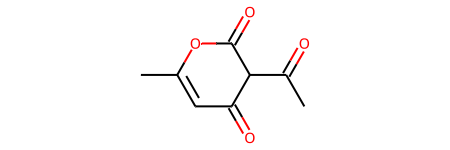

In [1946]:
M47= mol_list [46]
M47

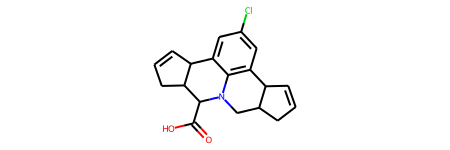

In [1947]:
M48= mol_list [47]
M48

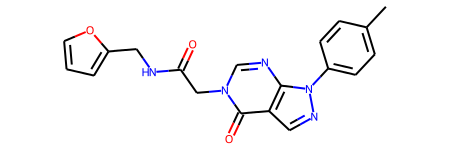

In [1948]:
M49= mol_list [48]
M49

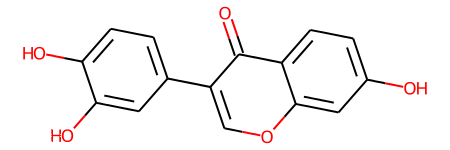

In [1949]:
M50= mol_list [49]
M50

In [1950]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 17,
 18,
 33,
 86,
 114,
 128,
 170,
 194,
 209,
 210,
 212,
 237,
 260,
 307,
 342,
 350,
 356,
 361,
 367,
 381,
 384,
 392,
 393,
 441,
 452,
 502,
 529,
 543,
 556,
 582,
 650,
 656,
 714,
 792,
 807,
 840,
 849,
 875,
 884,
 892,
 893,
 926,
 965]

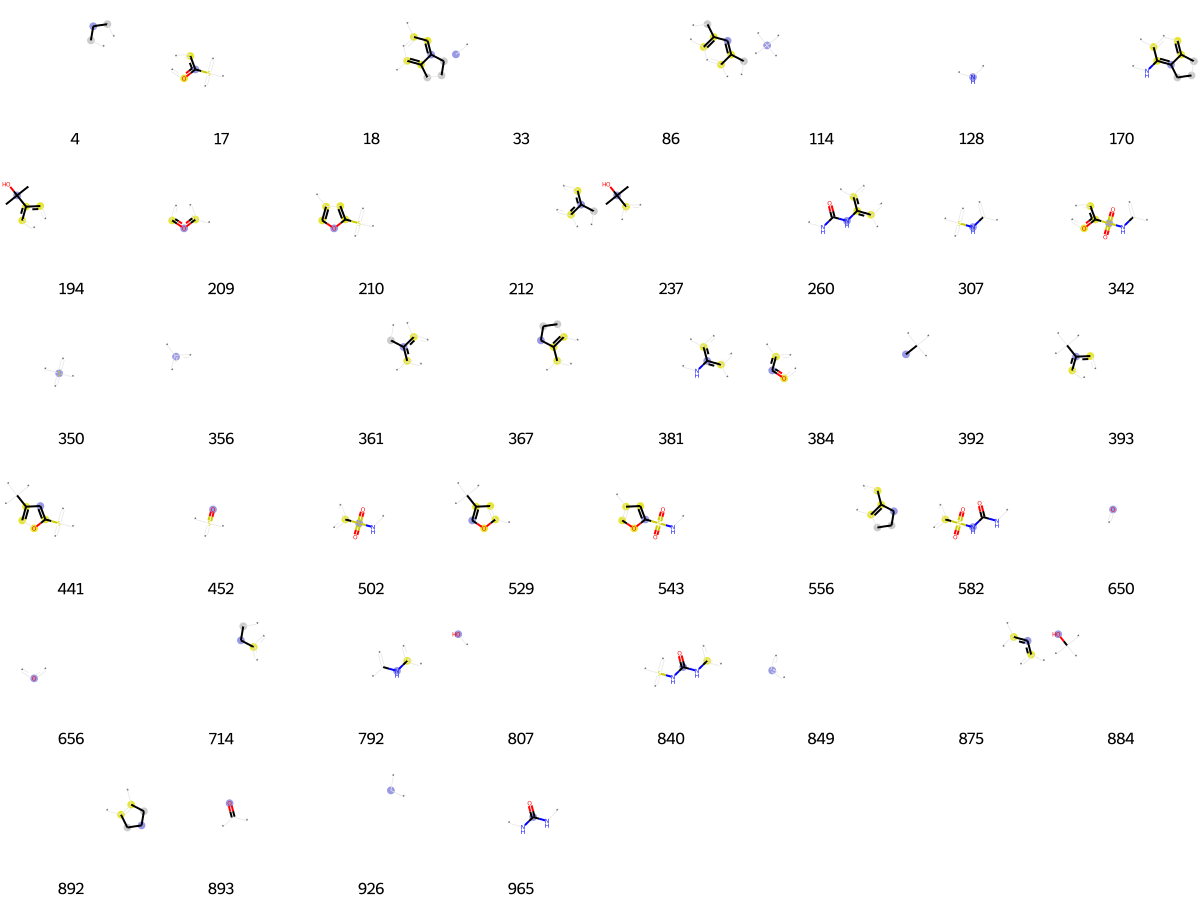

In [1951]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1952]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[90,
 356,
 378,
 416,
 428,
 434,
 506,
 530,
 607,
 656,
 700,
 713,
 728,
 806,
 834,
 841,
 849,
 918,
 983,
 988]

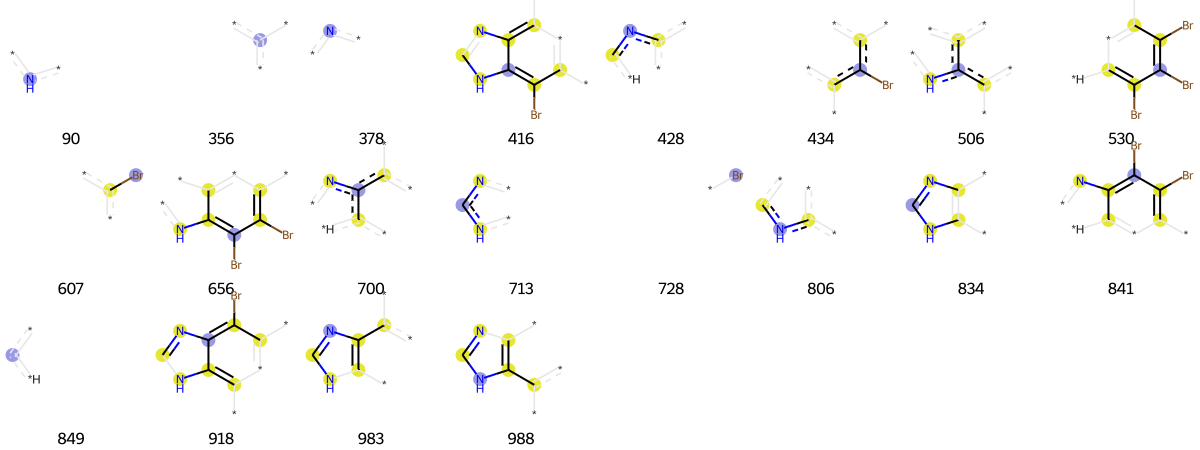

In [1953]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1954]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[5,
 15,
 19,
 59,
 63,
 64,
 128,
 152,
 200,
 233,
 268,
 313,
 314,
 338,
 356,
 361,
 365,
 378,
 428,
 433,
 448,
 449,
 486,
 501,
 641,
 650,
 662,
 672,
 673,
 700,
 726,
 738,
 771,
 792,
 801,
 807,
 831,
 842,
 848,
 849,
 892,
 893,
 915,
 926,
 935,
 947,
 986,
 1019]

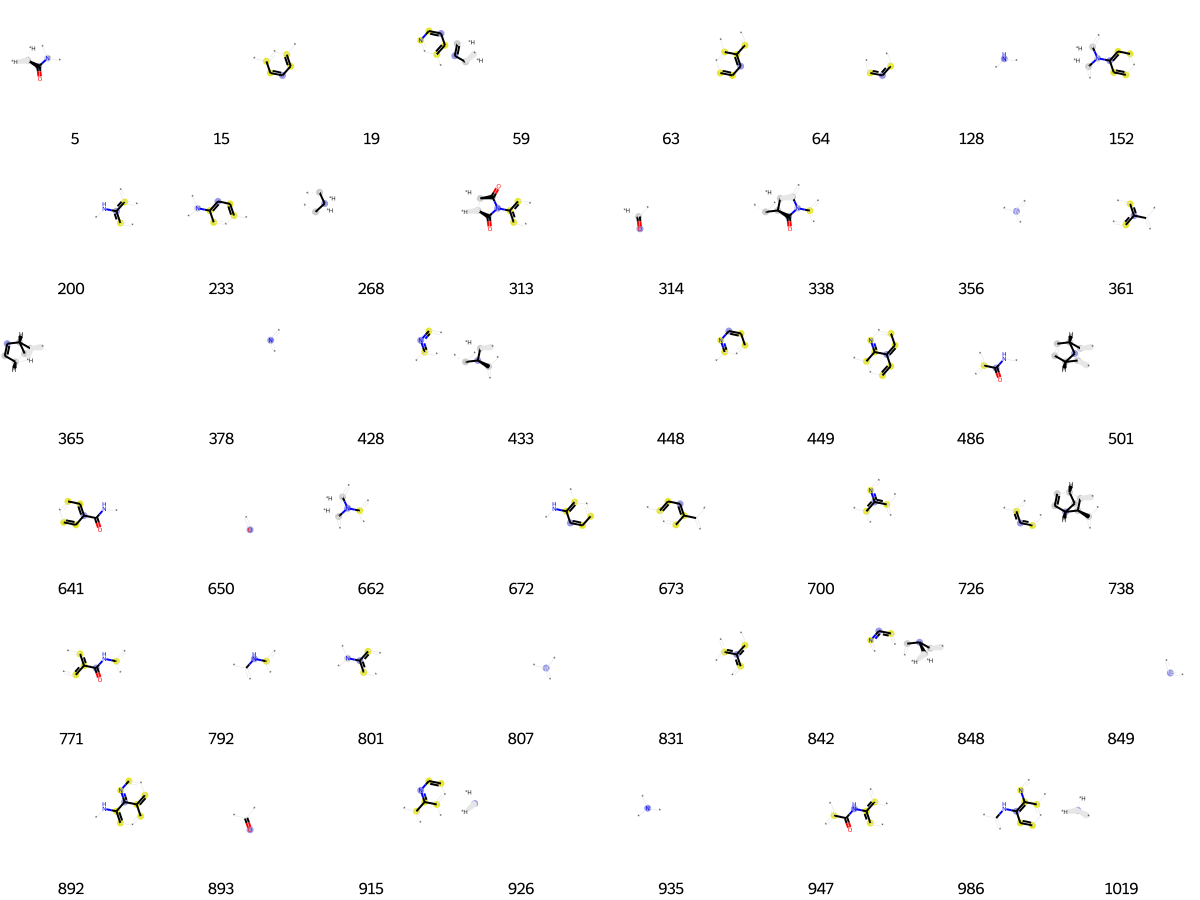

In [1955]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1956]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[20,
 33,
 36,
 62,
 77,
 80,
 147,
 222,
 233,
 250,
 251,
 297,
 314,
 356,
 378,
 424,
 433,
 485,
 492,
 498,
 577,
 606,
 610,
 650,
 656,
 688,
 726,
 728,
 740,
 765,
 783,
 807,
 831,
 848,
 849,
 863,
 897,
 904,
 935,
 955,
 1018,
 1019]

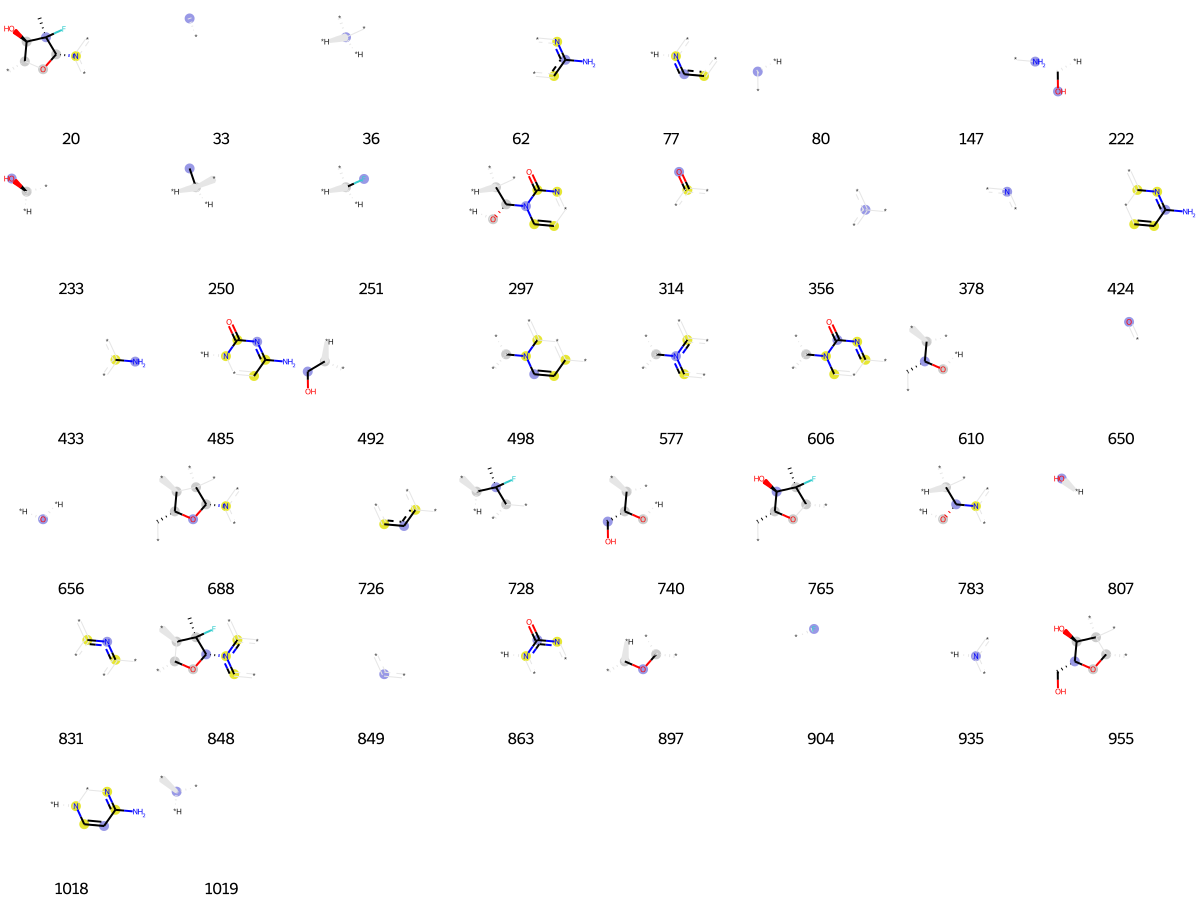

In [1957]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1958]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[11,
 33,
 64,
 126,
 128,
 162,
 164,
 171,
 175,
 356,
 376,
 378,
 385,
 386,
 419,
 423,
 428,
 444,
 486,
 511,
 624,
 650,
 675,
 695,
 705,
 707,
 715,
 726,
 751,
 753,
 758,
 792,
 807,
 838,
 847,
 849,
 893,
 909,
 939,
 946,
 957,
 967,
 1004,
 1017]

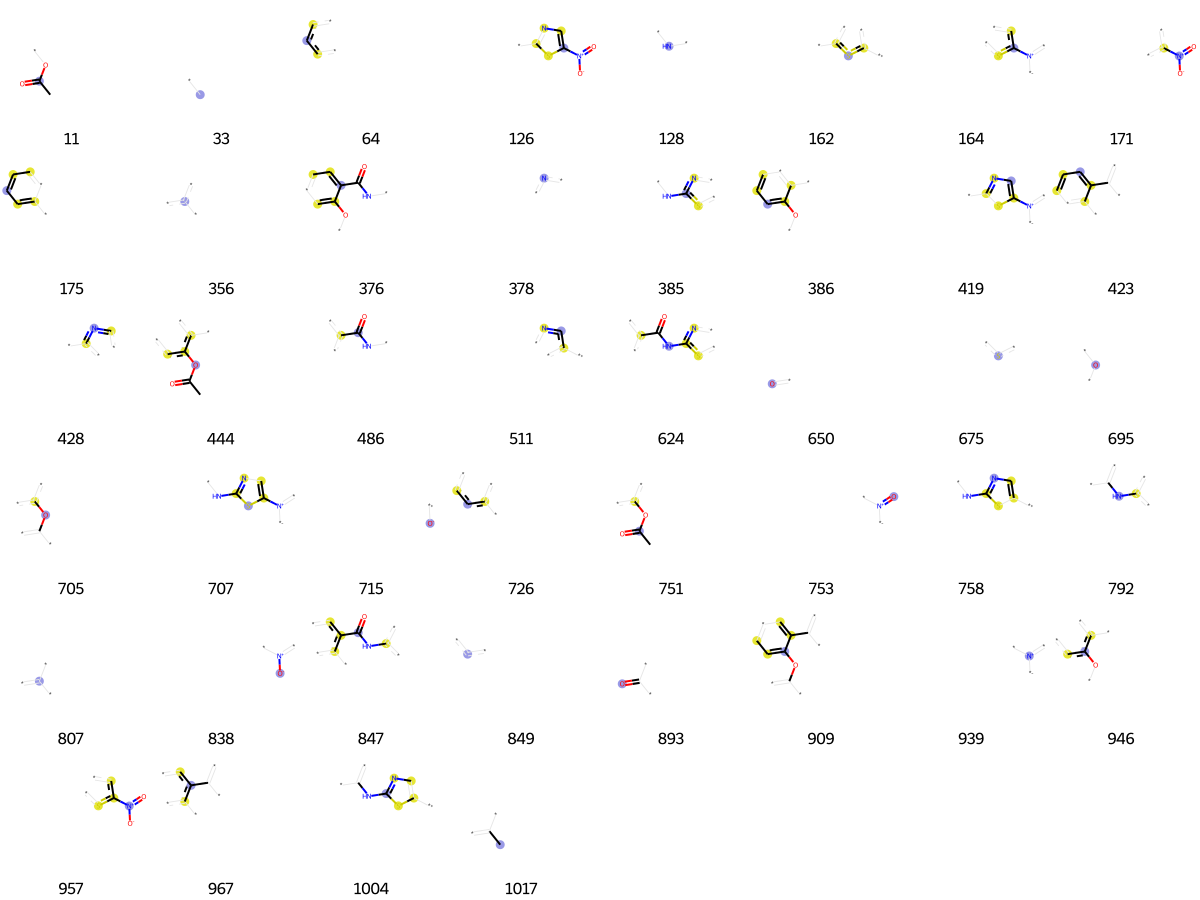

In [1959]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1960]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[2,
 4,
 5,
 8,
 10,
 14,
 15,
 16,
 33,
 36,
 39,
 41,
 51,
 59,
 64,
 90,
 97,
 102,
 104,
 114,
 119,
 123,
 128,
 189,
 199,
 212,
 231,
 268,
 288,
 298,
 301,
 307,
 310,
 314,
 350,
 356,
 361,
 369,
 372,
 381,
 383,
 387,
 392,
 397,
 402,
 412,
 452,
 472,
 483,
 525,
 526,
 550,
 591,
 628,
 650,
 666,
 679,
 684,
 685,
 695,
 699,
 726,
 734,
 739,
 749,
 752,
 758,
 765,
 807,
 816,
 826,
 835,
 849,
 884,
 890,
 893,
 904,
 907,
 922,
 926,
 935,
 953,
 955,
 976,
 985,
 1019,
 1020]

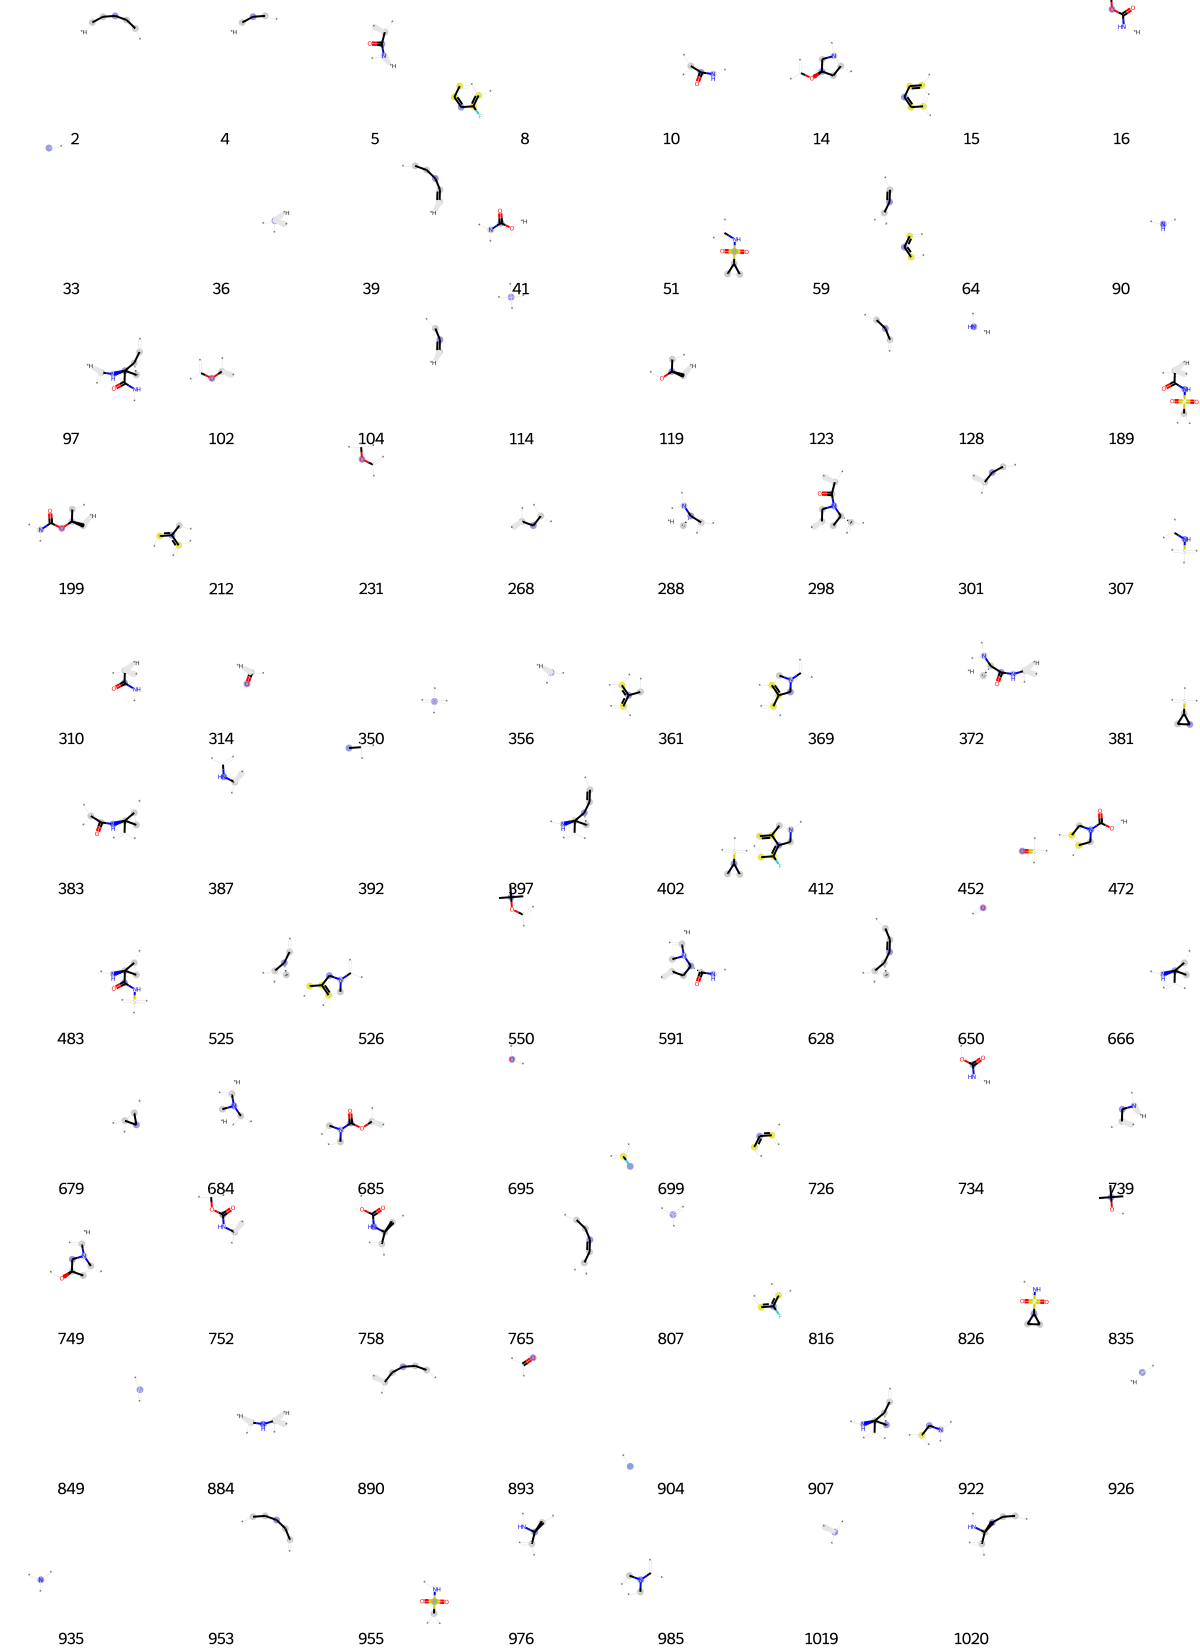

In [1961]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1962]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[39,
 73,
 82,
 106,
 165,
 202,
 216,
 294,
 301,
 333,
 356,
 378,
 431,
 436,
 482,
 517,
 561,
 578,
 586,
 619,
 625,
 650,
 659,
 709,
 726,
 807,
 816,
 831,
 849,
 854,
 875,
 893,
 898,
 926,
 974,
 1019]

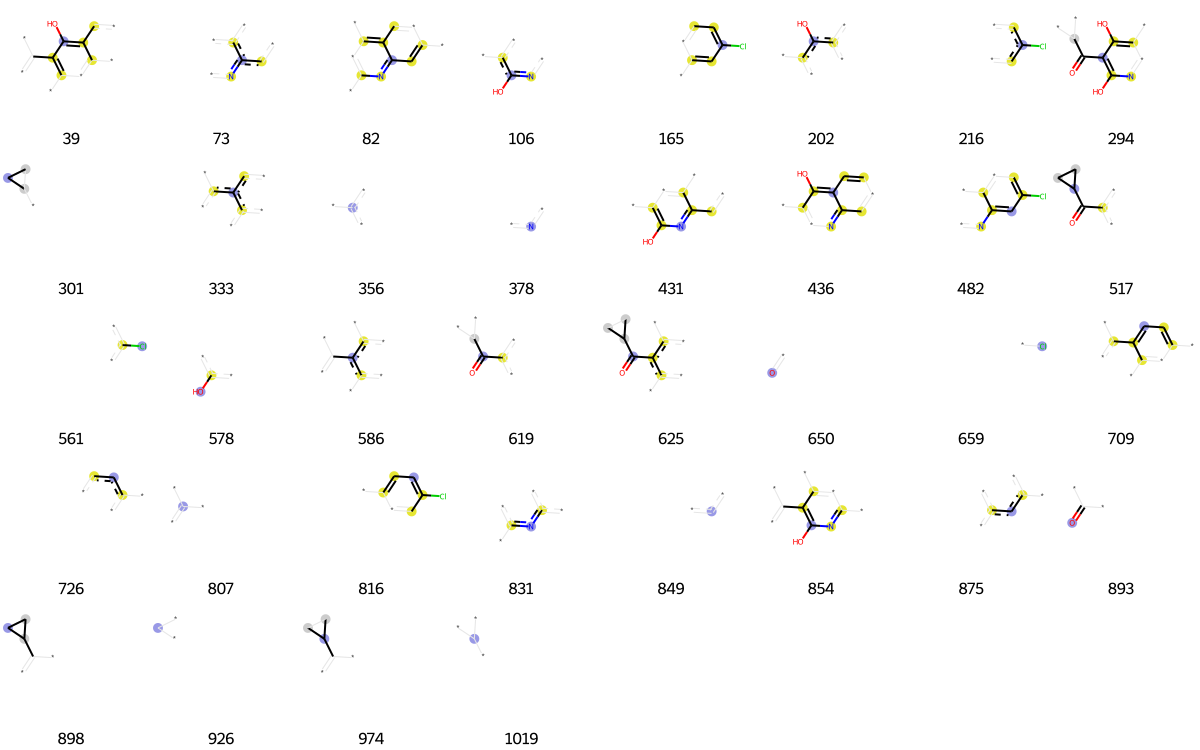

In [1963]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1964]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 15,
 31,
 33,
 52,
 64,
 80,
 116,
 139,
 196,
 216,
 227,
 239,
 264,
 274,
 283,
 294,
 322,
 334,
 341,
 356,
 387,
 389,
 555,
 557,
 562,
 577,
 605,
 632,
 650,
 695,
 705,
 726,
 795,
 807,
 820,
 849,
 875,
 881,
 888,
 893,
 932]

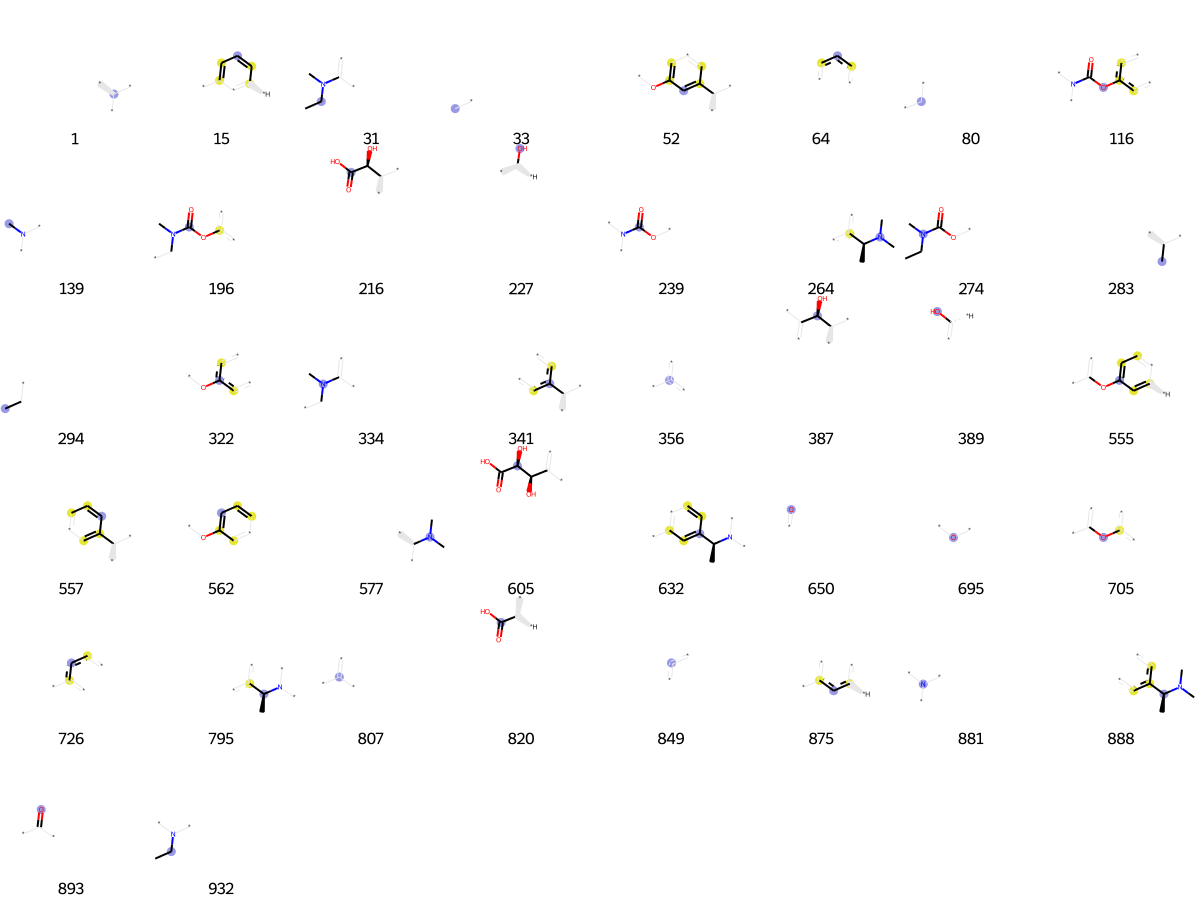

In [1965]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1966]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[30,
 36,
 46,
 90,
 136,
 138,
 190,
 216,
 284,
 305,
 356,
 378,
 391,
 473,
 484,
 492,
 511,
 537,
 556,
 561,
 609,
 659,
 671,
 676,
 695,
 726,
 808,
 816,
 849,
 855,
 896,
 915,
 926,
 940,
 980]

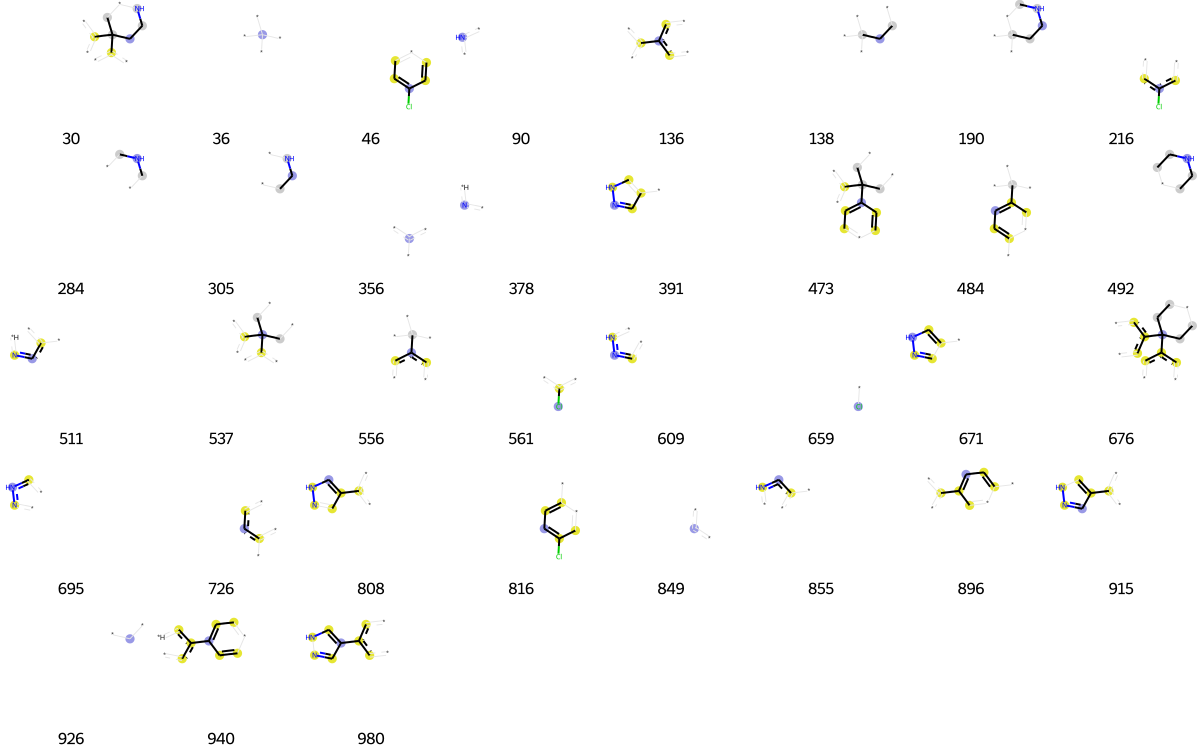

In [1967]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1968]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 13,
 33,
 44,
 59,
 66,
 79,
 80,
 102,
 116,
 120,
 147,
 197,
 256,
 283,
 284,
 293,
 295,
 325,
 351,
 356,
 371,
 378,
 428,
 433,
 435,
 507,
 511,
 525,
 540,
 579,
 582,
 612,
 650,
 694,
 695,
 698,
 762,
 807,
 831,
 840,
 849,
 881,
 893,
 926,
 949,
 965,
 994,
 1004,
 1017]

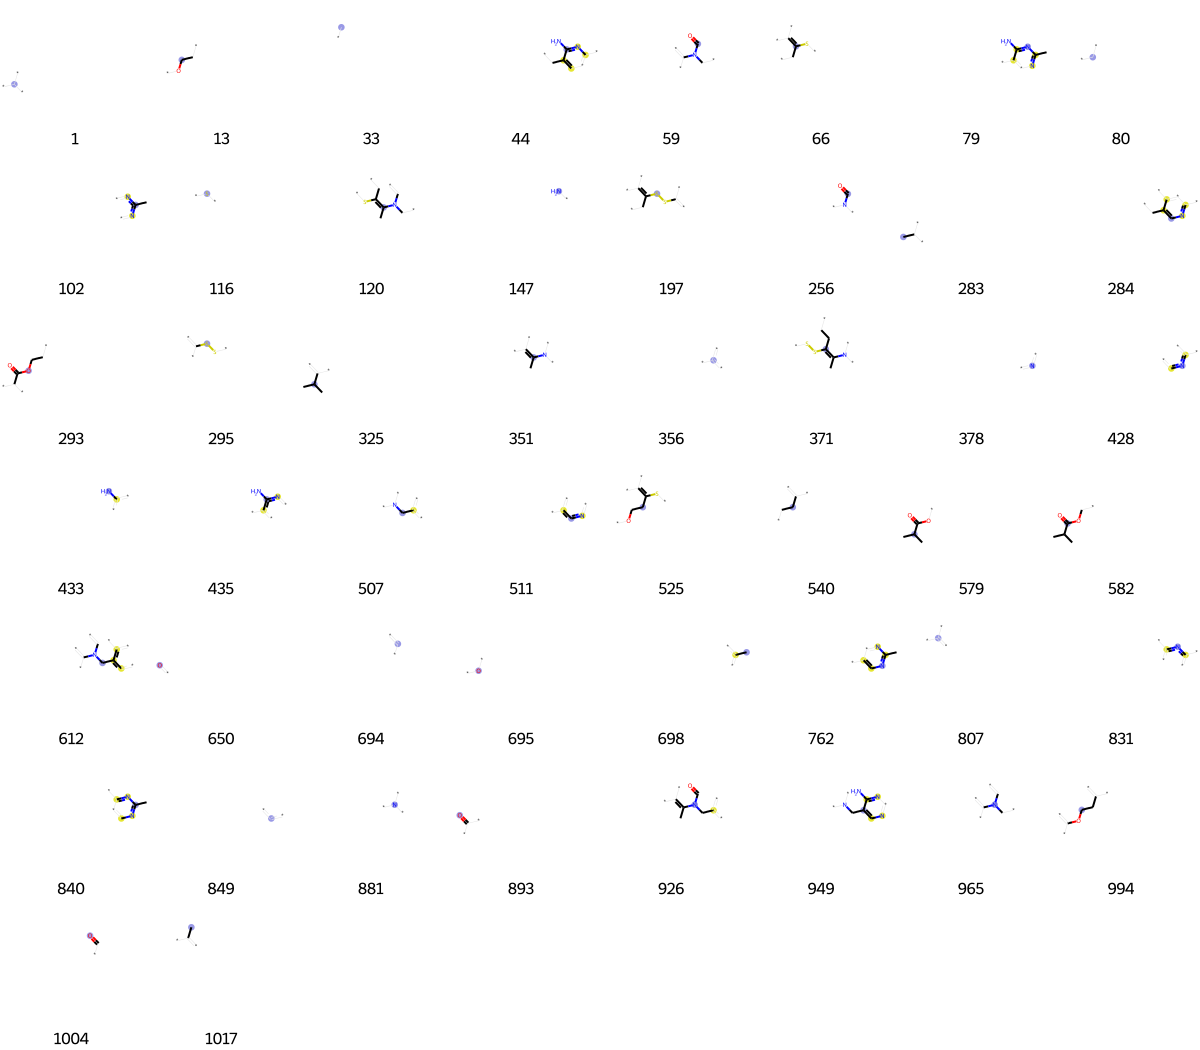

In [1969]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1970]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[4,
 15,
 33,
 61,
 64,
 94,
 117,
 128,
 136,
 140,
 171,
 198,
 221,
 240,
 242,
 246,
 249,
 250,
 319,
 350,
 356,
 378,
 385,
 452,
 502,
 512,
 515,
 543,
 552,
 586,
 630,
 650,
 675,
 695,
 702,
 715,
 726,
 736,
 753,
 785,
 798,
 806,
 831,
 838,
 841,
 849,
 875,
 916,
 939,
 946,
 980]

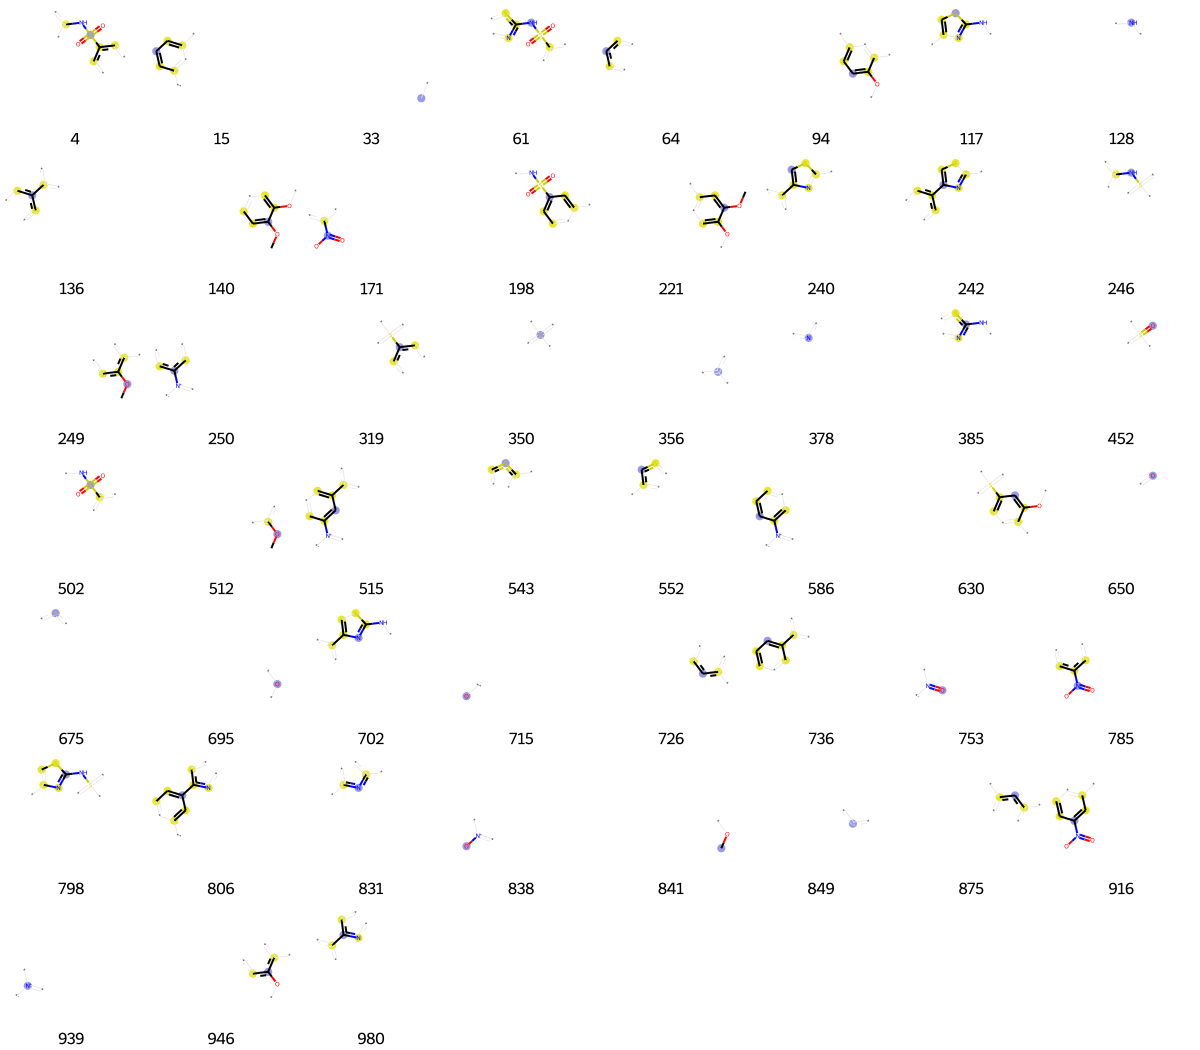

In [1971]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1972]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[14,
 33,
 73,
 90,
 119,
 121,
 136,
 180,
 207,
 212,
 233,
 260,
 289,
 356,
 378,
 407,
 430,
 454,
 456,
 484,
 496,
 535,
 567,
 578,
 585,
 674,
 687,
 721,
 726,
 745,
 754,
 788,
 801,
 807,
 831,
 849,
 875,
 896,
 915,
 926,
 935,
 997]

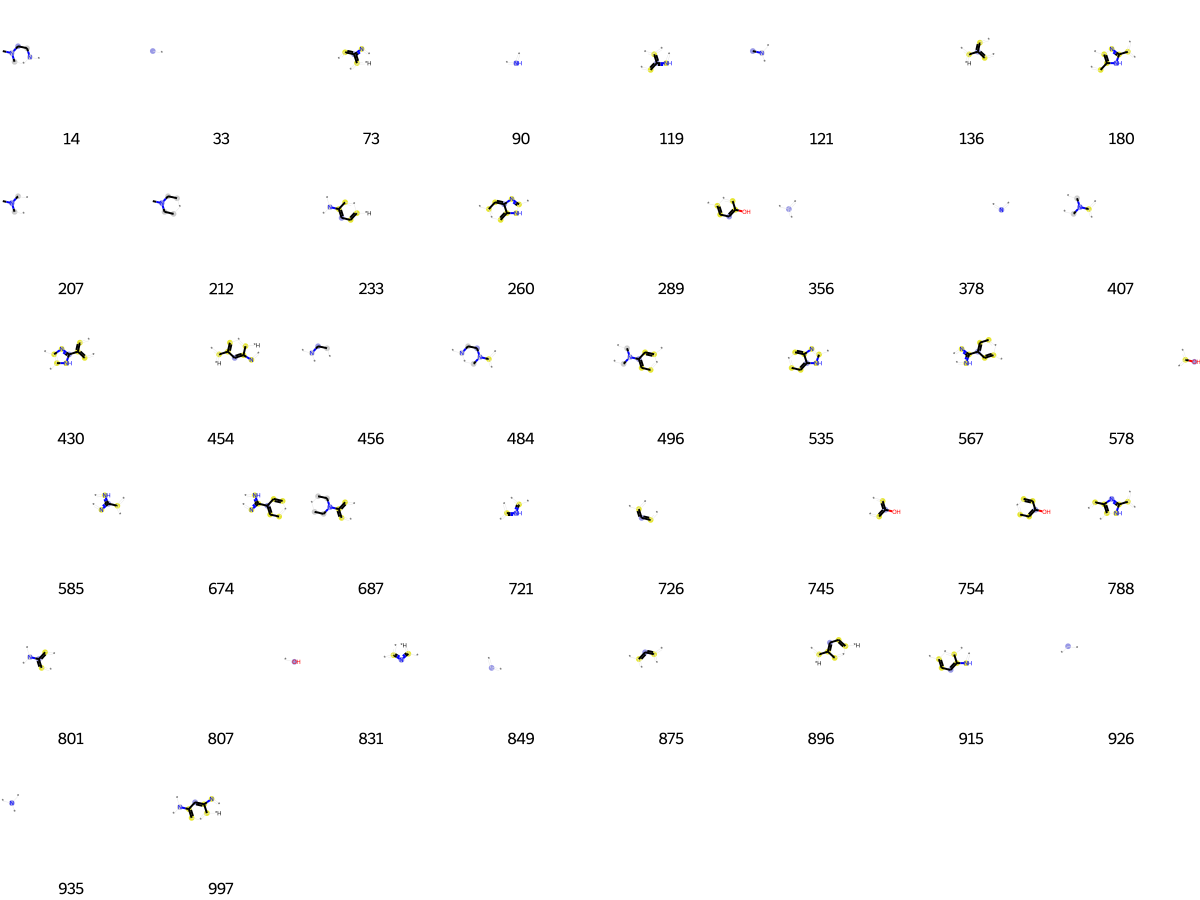

In [1973]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1974]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[25,
 33,
 36,
 38,
 46,
 56,
 80,
 102,
 124,
 138,
 147,
 214,
 232,
 250,
 263,
 265,
 284,
 285,
 299,
 301,
 347,
 362,
 389,
 391,
 399,
 501,
 519,
 529,
 540,
 562,
 611,
 650,
 656,
 661,
 682,
 695,
 709,
 713,
 785,
 801,
 807,
 835,
 861,
 864,
 892,
 893,
 897,
 926,
 1003,
 1019]

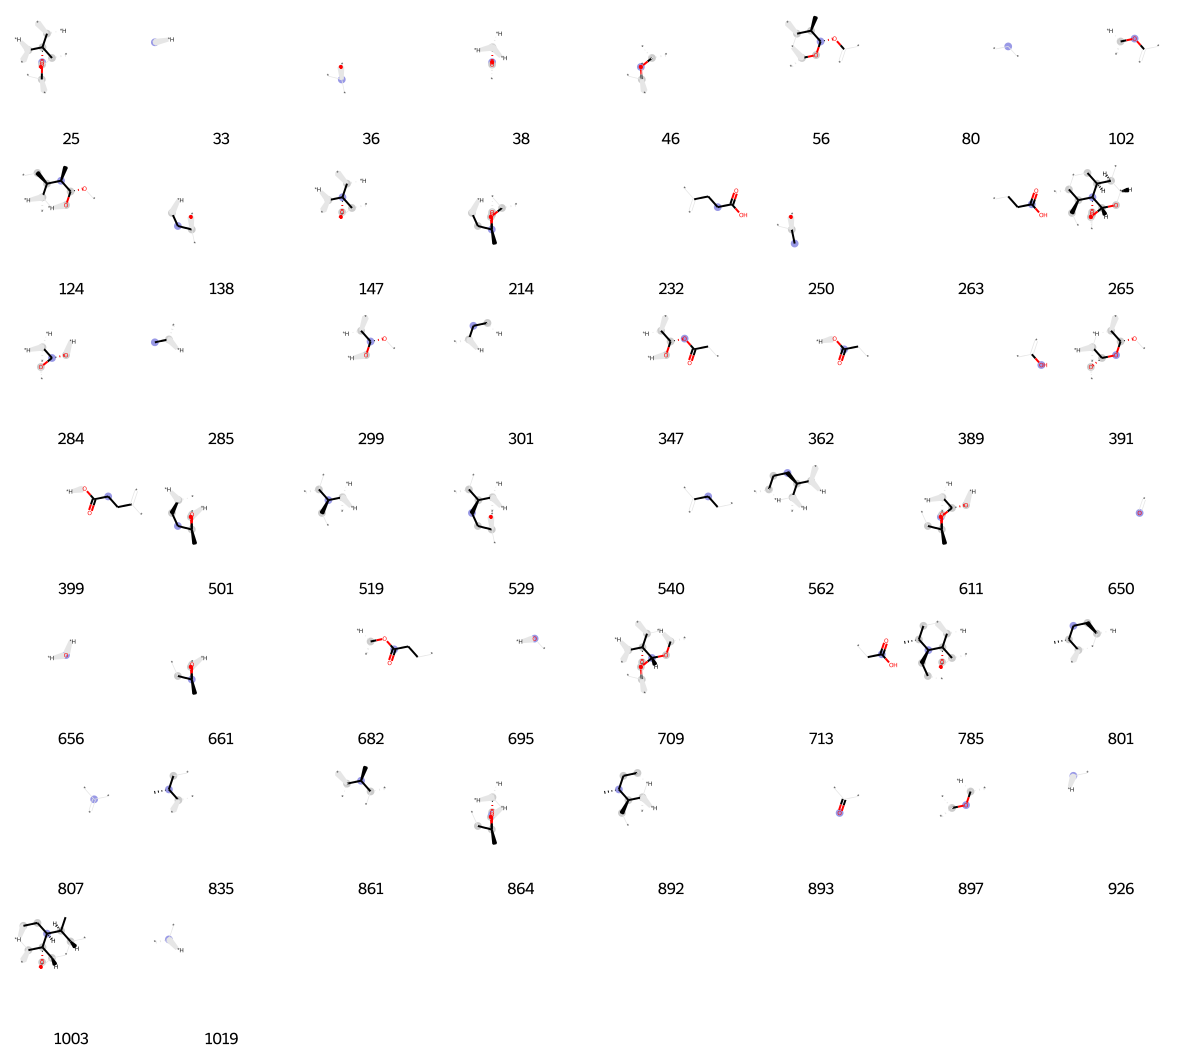

In [1975]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1976]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 9,
 15,
 19,
 33,
 64,
 66,
 73,
 80,
 127,
 128,
 133,
 136,
 165,
 207,
 225,
 247,
 269,
 283,
 289,
 301,
 333,
 348,
 352,
 356,
 361,
 378,
 387,
 392,
 394,
 410,
 422,
 428,
 448,
 464,
 486,
 505,
 511,
 549,
 552,
 606,
 610,
 613,
 629,
 631,
 641,
 650,
 667,
 668,
 672,
 673,
 708,
 726,
 807,
 823,
 831,
 842,
 849,
 856,
 893,
 896,
 926,
 935,
 945,
 955,
 980,
 984,
 1019]

In [1977]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 43,
 45,
 58,
 67,
 68,
 80,
 81,
 90,
 94,
 118,
 121,
 128,
 136,
 159,
 175,
 181,
 184,
 191,
 233,
 267,
 313,
 314,
 326,
 352,
 356,
 378,
 386,
 391,
 486,
 504,
 511,
 576,
 593,
 609,
 616,
 646,
 650,
 654,
 671,
 695,
 698,
 699,
 726,
 739,
 792,
 801,
 807,
 808,
 816,
 831,
 843,
 847,
 849,
 855,
 875,
 883,
 893,
 904,
 915,
 921,
 935,
 938,
 946,
 954,
 967,
 969,
 1009]

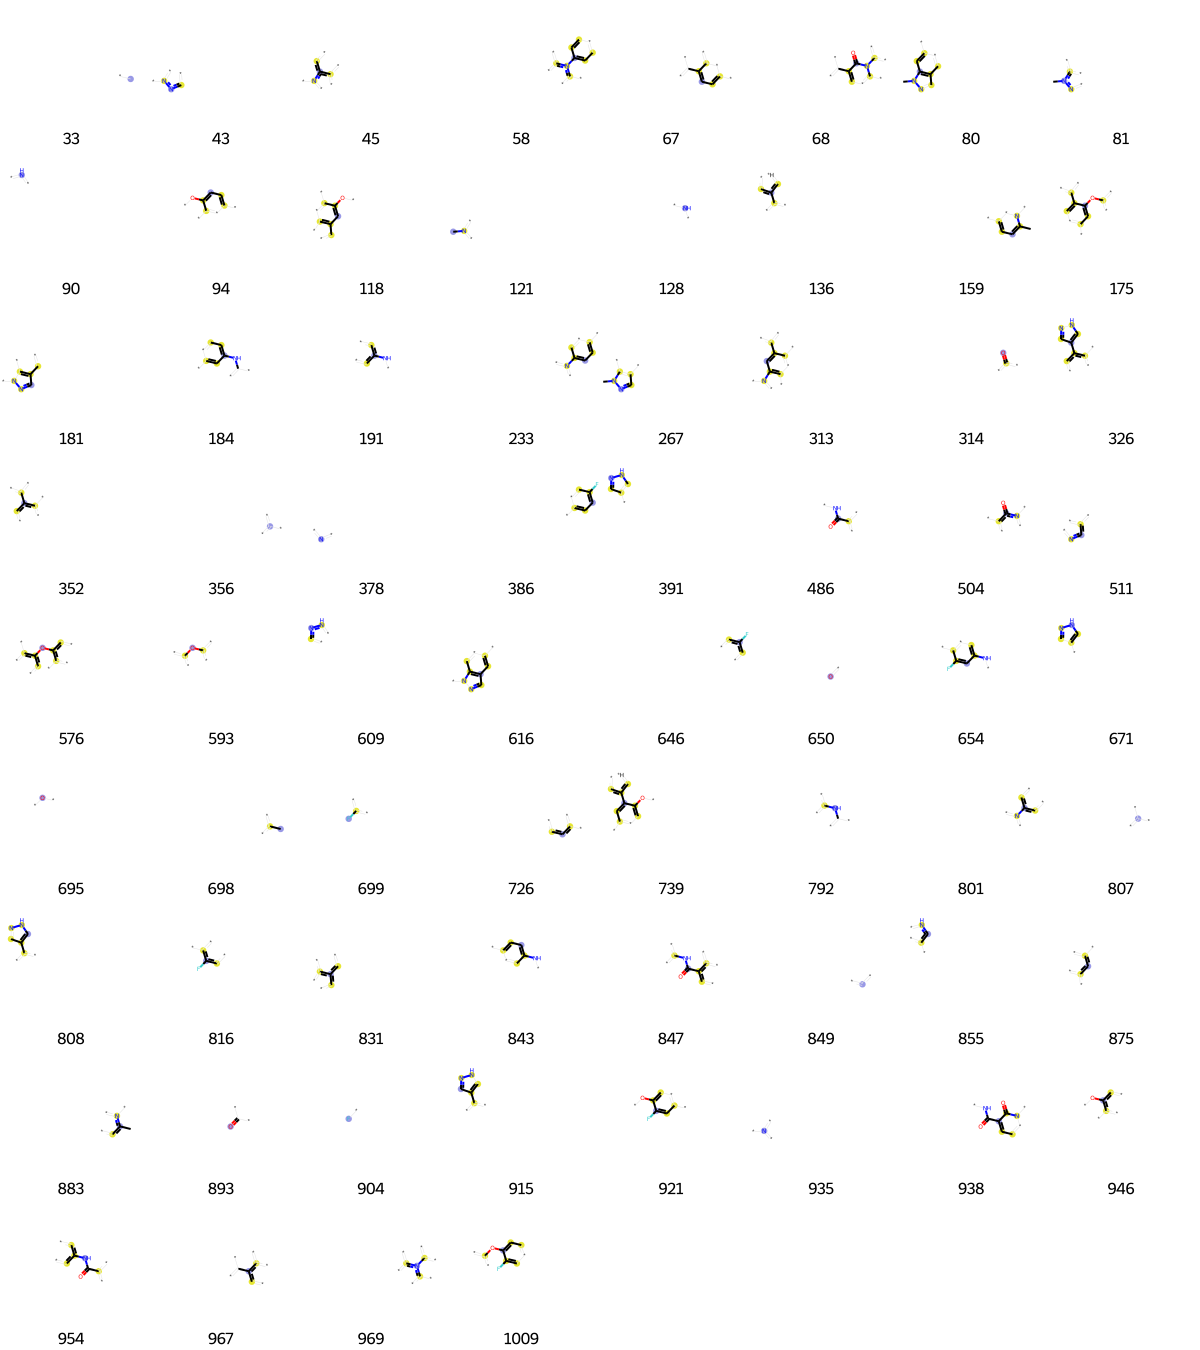

In [1978]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1979]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 24,
 28,
 33,
 42,
 45,
 52,
 64,
 68,
 79,
 80,
 90,
 117,
 119,
 128,
 139,
 143,
 165,
 175,
 216,
 227,
 271,
 309,
 356,
 370,
 375,
 387,
 389,
 460,
 486,
 561,
 629,
 650,
 659,
 668,
 721,
 726,
 730,
 744,
 747,
 770,
 793,
 807,
 816,
 831,
 849,
 857,
 875,
 881,
 893,
 915]

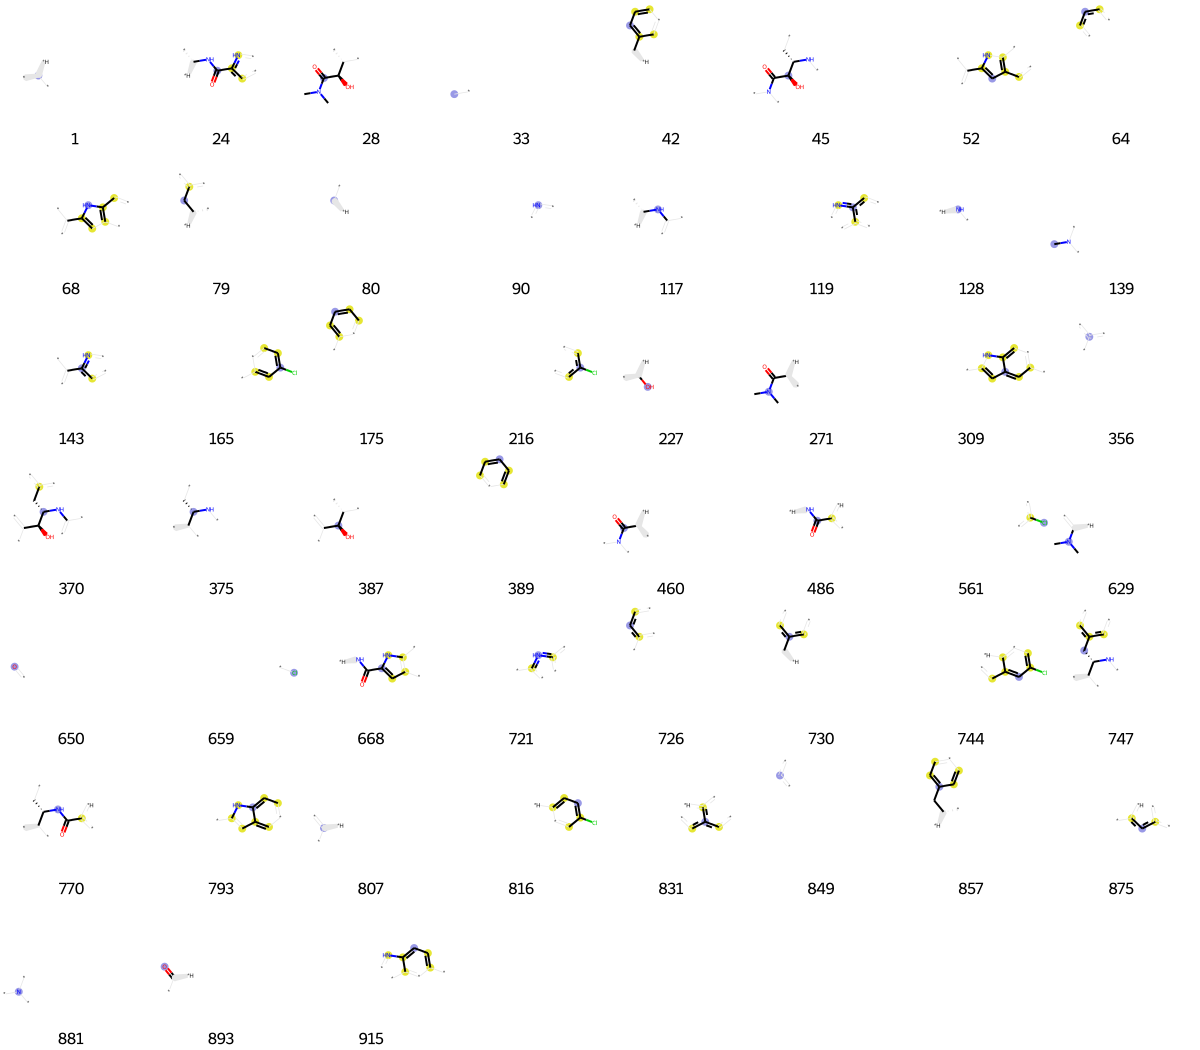

In [1980]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1981]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[29,
 33,
 42,
 45,
 64,
 80,
 152,
 175,
 196,
 212,
 221,
 231,
 237,
 249,
 276,
 301,
 314,
 333,
 352,
 354,
 356,
 389,
 405,
 456,
 512,
 514,
 587,
 643,
 649,
 650,
 659,
 695,
 726,
 730,
 741,
 747,
 767,
 784,
 800,
 841,
 849,
 856,
 875,
 923,
 926,
 935,
 946,
 1019]

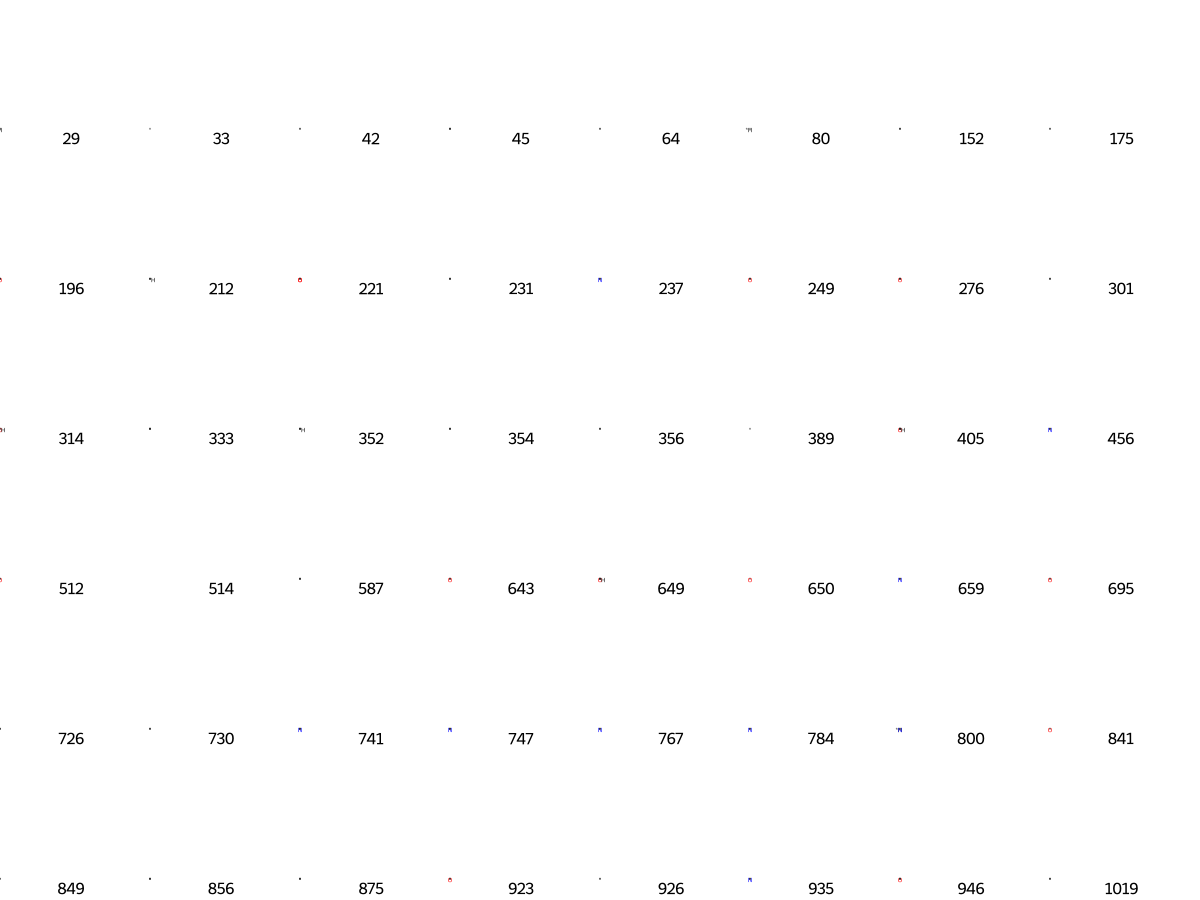

In [1982]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1983]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 65,
 80,
 99,
 114,
 140,
 147,
 158,
 191,
 236,
 288,
 314,
 356,
 456,
 650,
 661,
 714,
 735,
 798,
 807,
 874,
 893,
 926,
 935]

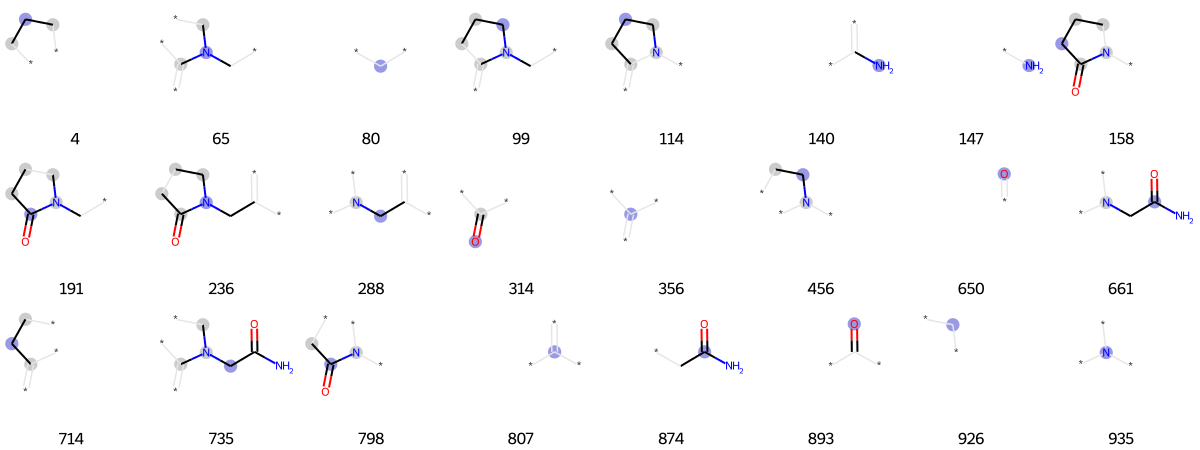

In [1984]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1985]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 36,
 42,
 46,
 84,
 91,
 128,
 138,
 177,
 178,
 209,
 228,
 231,
 242,
 245,
 250,
 258,
 262,
 268,
 281,
 301,
 314,
 336,
 356,
 412,
 418,
 429,
 452,
 479,
 504,
 516,
 519,
 529,
 534,
 575,
 650,
 656,
 679,
 695,
 696,
 706,
 710,
 714,
 769,
 784,
 807,
 821,
 841,
 849,
 893,
 917,
 926,
 970,
 985,
 1006,
 1009,
 1015,
 1019]

In [1986]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 33,
 42,
 45,
 90,
 126,
 128,
 235,
 301,
 305,
 333,
 338,
 350,
 356,
 358,
 361,
 367,
 374,
 444,
 452,
 456,
 472,
 473,
 483,
 543,
 592,
 650,
 692,
 698,
 714,
 726,
 731,
 734,
 763,
 799,
 807,
 832,
 840,
 849,
 873,
 875,
 926,
 935,
 997,
 1013,
 1019]

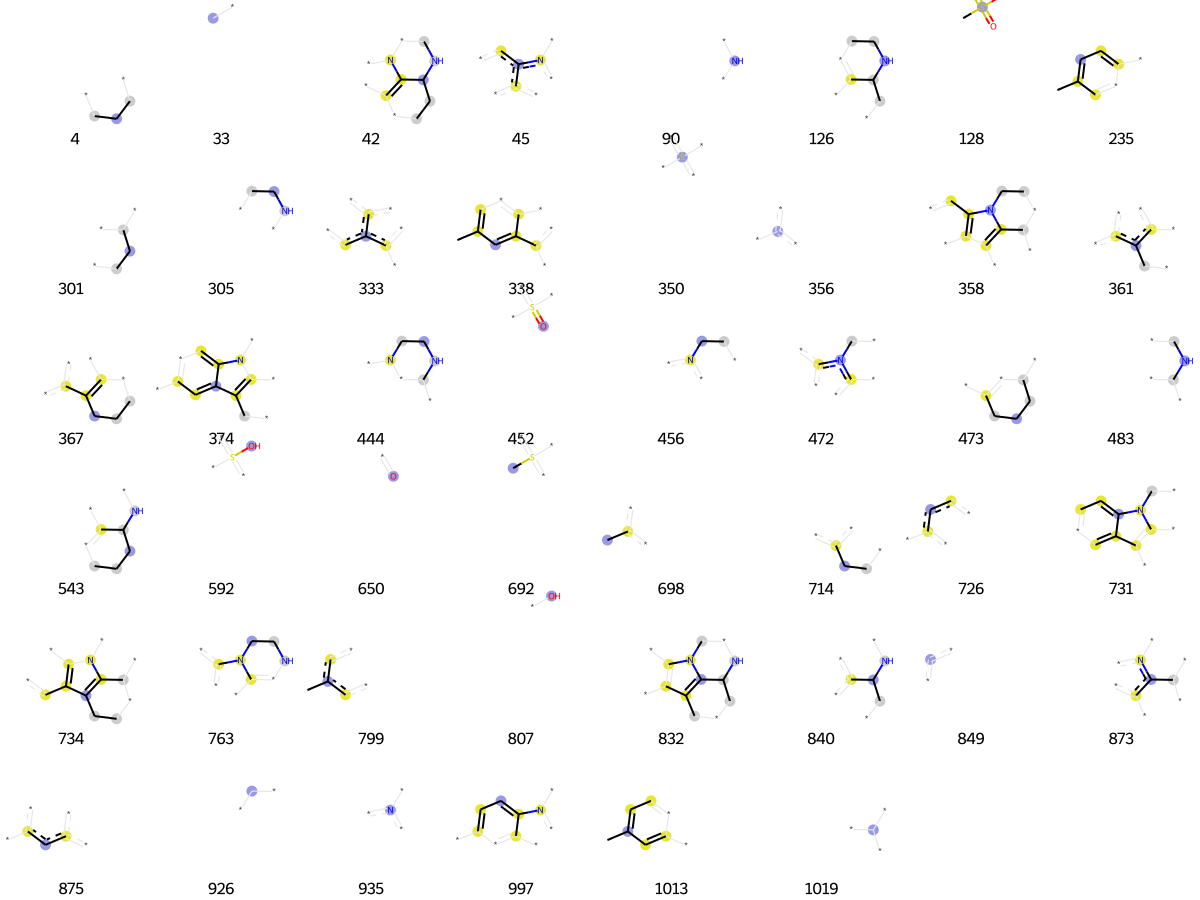

In [1987]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1988]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 3,
 33,
 34,
 41,
 69,
 80,
 98,
 103,
 114,
 134,
 144,
 159,
 233,
 236,
 268,
 271,
 283,
 294,
 301,
 344,
 351,
 356,
 393,
 404,
 429,
 430,
 439,
 475,
 498,
 507,
 520,
 521,
 528,
 564,
 582,
 585,
 641,
 650,
 662,
 666,
 690,
 695,
 726,
 730,
 807,
 809,
 849,
 875,
 881,
 891,
 893,
 903,
 904,
 926,
 935,
 954,
 1017,
 1019]

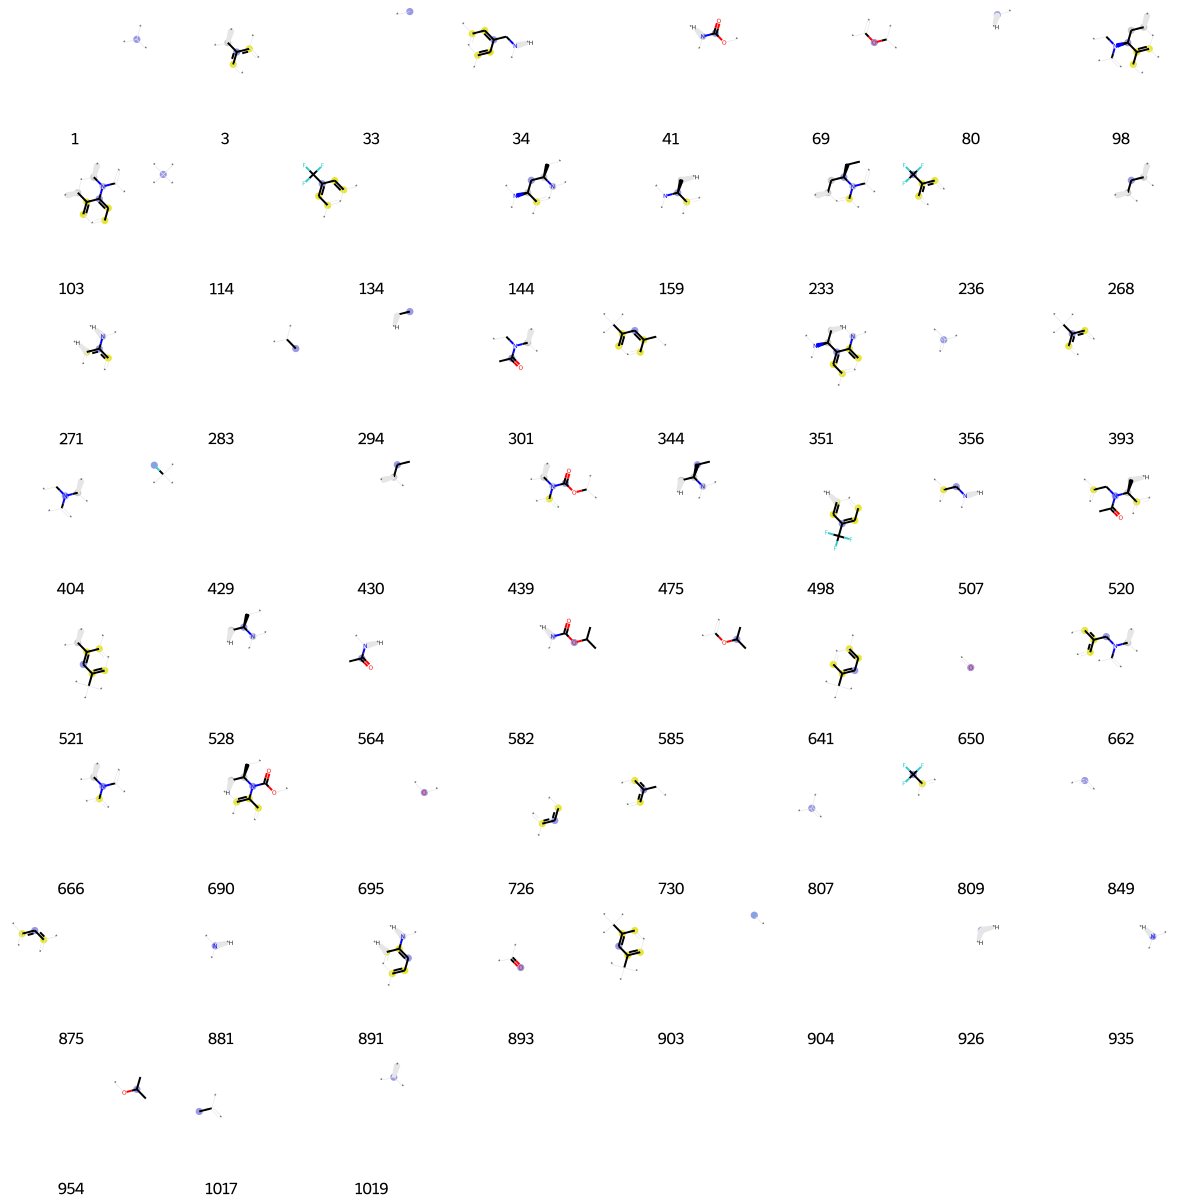

In [1989]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1990]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[36,
 64,
 90,
 119,
 133,
 142,
 155,
 175,
 275,
 314,
 324,
 333,
 352,
 356,
 361,
 446,
 540,
 549,
 551,
 607,
 622,
 647,
 650,
 653,
 688,
 706,
 721,
 726,
 728,
 758,
 766,
 849,
 875,
 906,
 909,
 915,
 926,
 958,
 984]

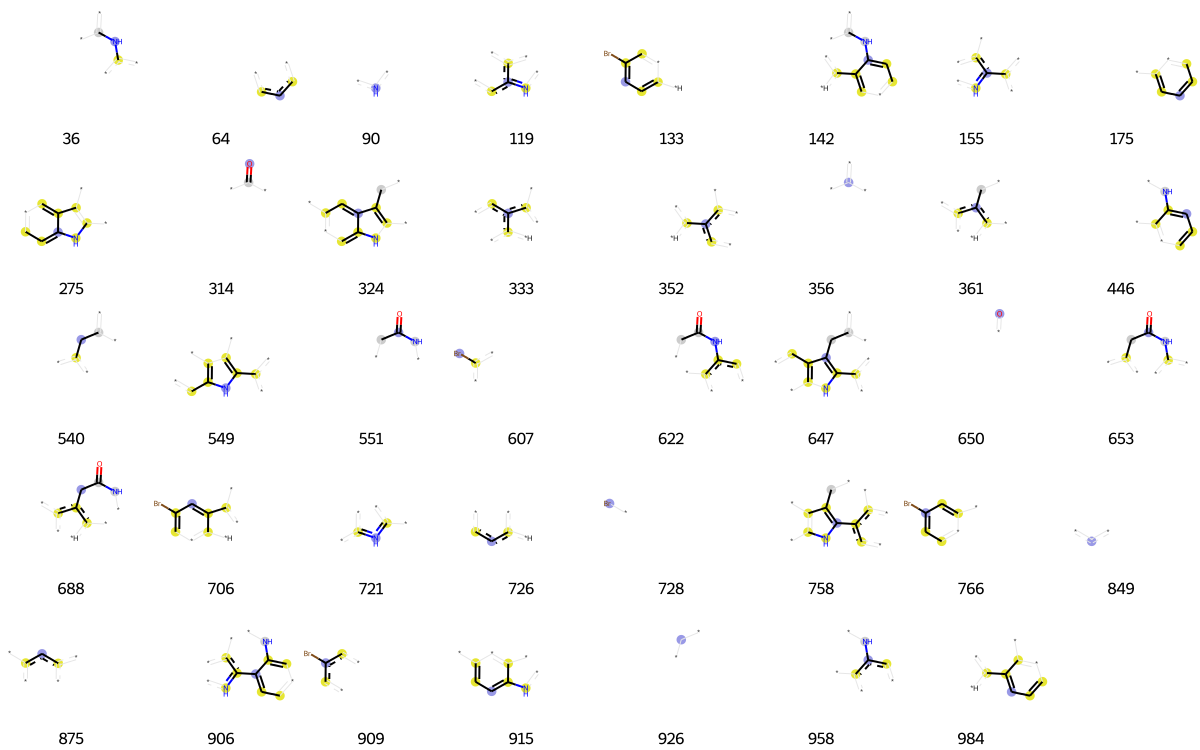

In [1991]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1992]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 64,
 69,
 80,
 90,
 106,
 119,
 160,
 179,
 208,
 219,
 222,
 314,
 356,
 428,
 452,
 473,
 475,
 512,
 541,
 650,
 695,
 698,
 710,
 722,
 807,
 841,
 886,
 887]

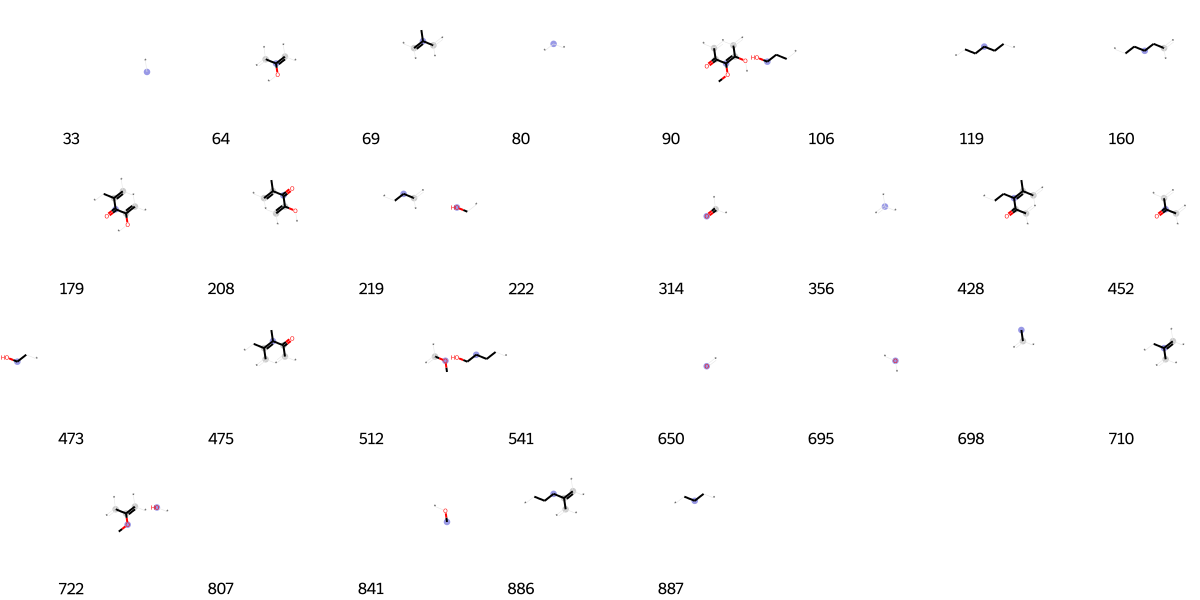

In [1993]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1994]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[4,
 13,
 19,
 64,
 73,
 80,
 102,
 116,
 121,
 160,
 175,
 189,
 202,
 289,
 356,
 378,
 389,
 398,
 401,
 423,
 428,
 430,
 448,
 450,
 456,
 458,
 459,
 533,
 600,
 612,
 658,
 674,
 695,
 710,
 726,
 732,
 767,
 808,
 816,
 831,
 842,
 849,
 926,
 935,
 965,
 974]

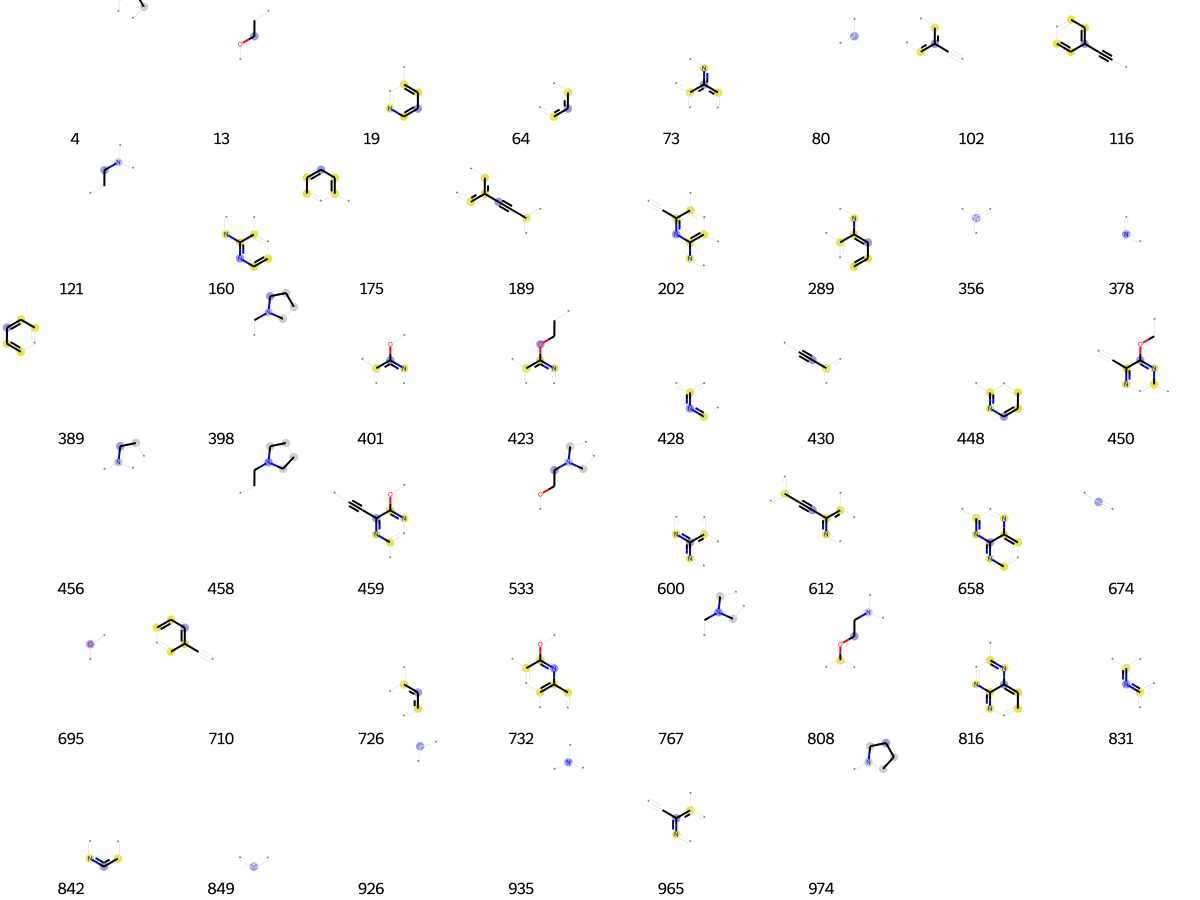

In [1995]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1996]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 80,
 147,
 176,
 180,
 202,
 360,
 389,
 403,
 487,
 520,
 540,
 615,
 650,
 694,
 715,
 739,
 757,
 767,
 786,
 807,
 820,
 825,
 853,
 893,
 900,
 920,
 967]

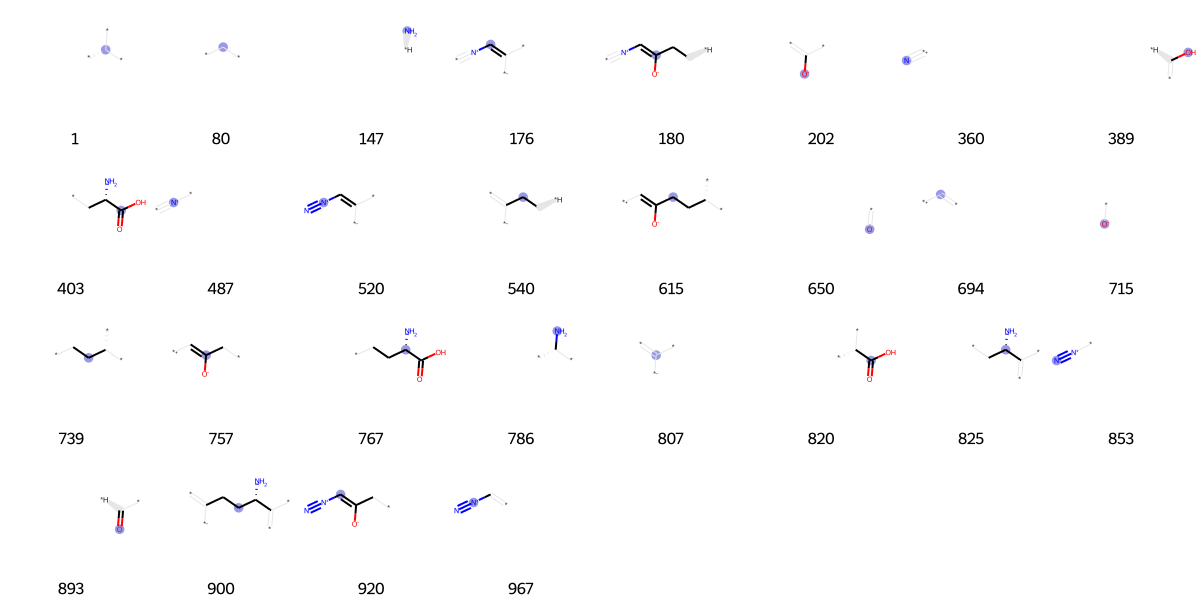

In [1997]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1998]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[2,
 14,
 33,
 67,
 74,
 80,
 90,
 91,
 119,
 121,
 122,
 128,
 200,
 207,
 212,
 233,
 301,
 310,
 328,
 333,
 356,
 378,
 381,
 406,
 407,
 439,
 456,
 484,
 486,
 496,
 515,
 516,
 523,
 524,
 565,
 568,
 610,
 612,
 646,
 650,
 656,
 687,
 699,
 708,
 716,
 720,
 726,
 730,
 767,
 792,
 801,
 807,
 809,
 819,
 847,
 849,
 875,
 893,
 904,
 910,
 915,
 926,
 935,
 944,
 950,
 967,
 980,
 1019]

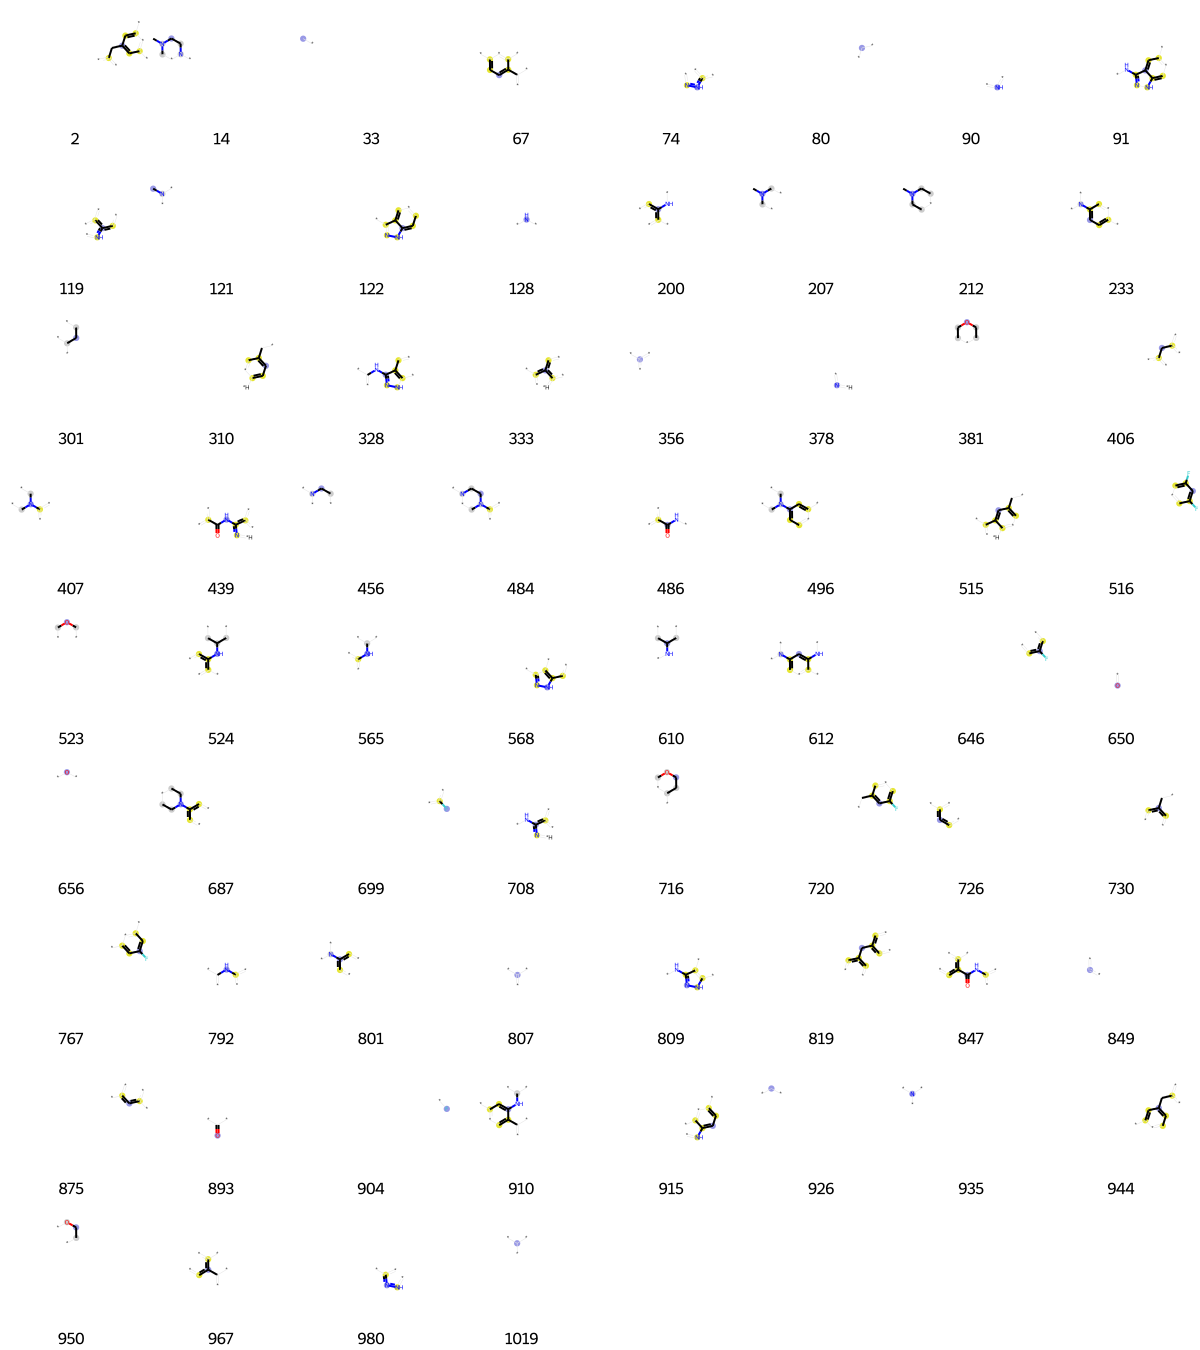

In [1999]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2000]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[15,
 19,
 23,
 64,
 102,
 112,
 136,
 248,
 257,
 265,
 305,
 356,
 360,
 361,
 378,
 437,
 511,
 518,
 562,
 579,
 607,
 656,
 674,
 710,
 726,
 736,
 790,
 811,
 818,
 831,
 833,
 842,
 849,
 875,
 886,
 951,
 989]

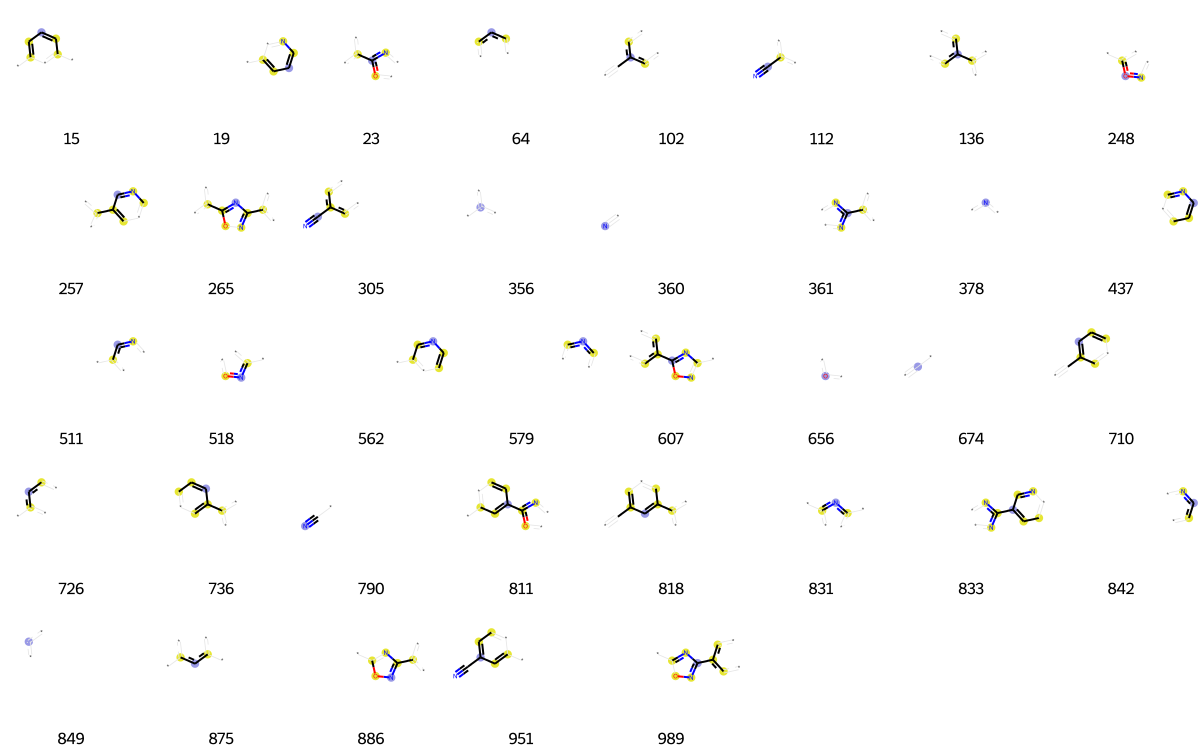

In [2001]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2002]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[4,
 33,
 36,
 45,
 62,
 64,
 80,
 83,
 99,
 138,
 175,
 238,
 239,
 256,
 261,
 294,
 314,
 327,
 333,
 334,
 356,
 361,
 397,
 406,
 456,
 500,
 541,
 544,
 549,
 605,
 650,
 714,
 726,
 734,
 776,
 798,
 802,
 830,
 849,
 873,
 888,
 926,
 935,
 940,
 962,
 969,
 1019]

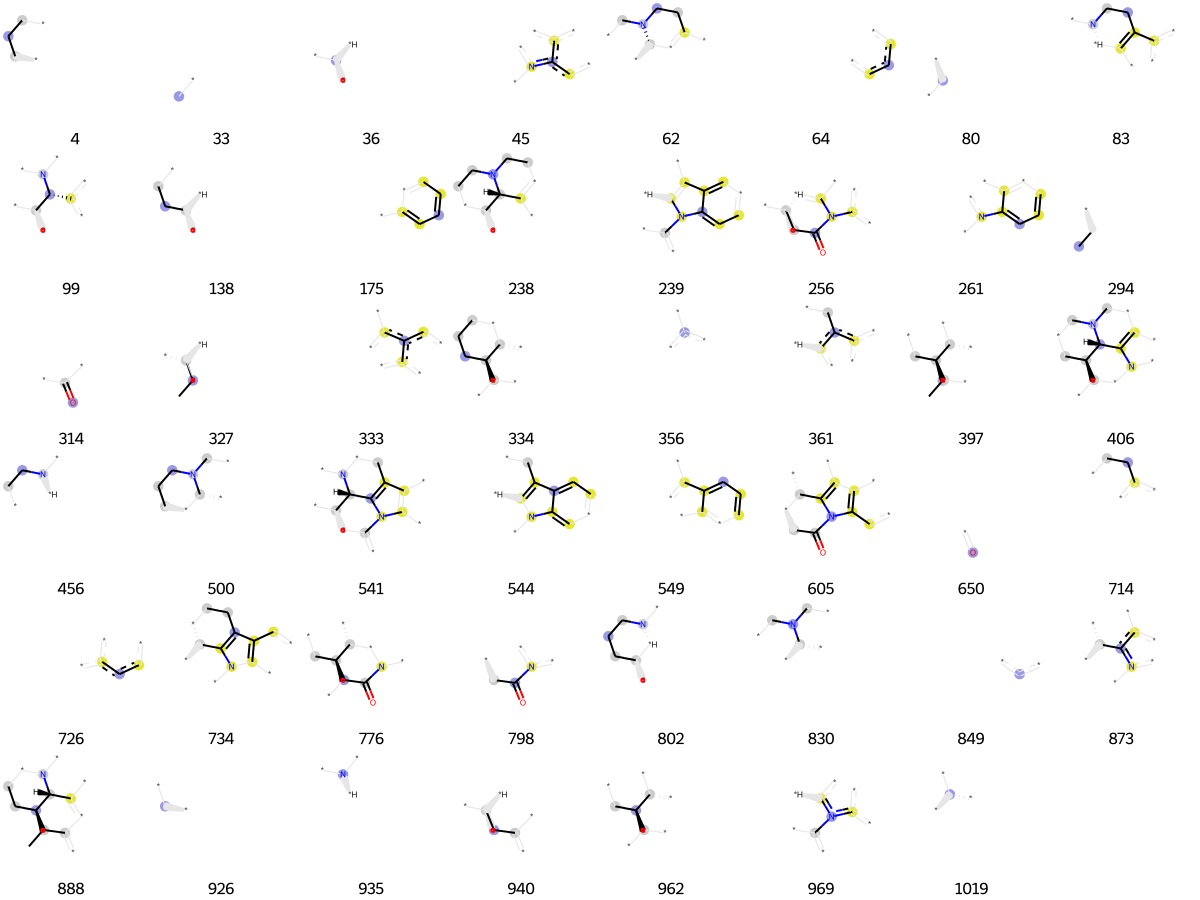

In [2003]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2004]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 33,
 80,
 106,
 154,
 189,
 202,
 294,
 457,
 650,
 715,
 739,
 769,
 794,
 800,
 807,
 853,
 893]

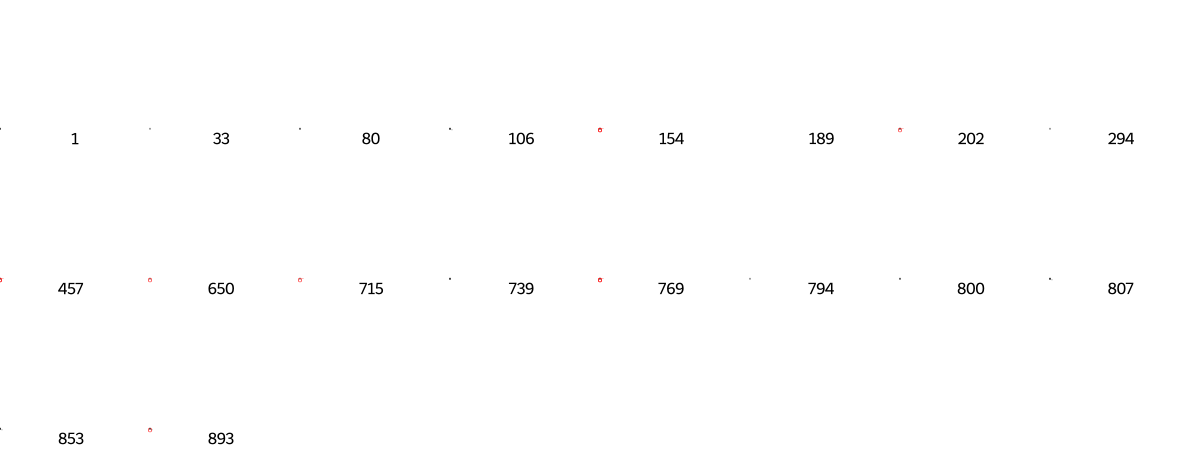

In [2005]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2006]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 36,
 64,
 80,
 147,
 175,
 212,
 250,
 356,
 451,
 493,
 563,
 684,
 726,
 788,
 849,
 862,
 874,
 926,
 940,
 981]

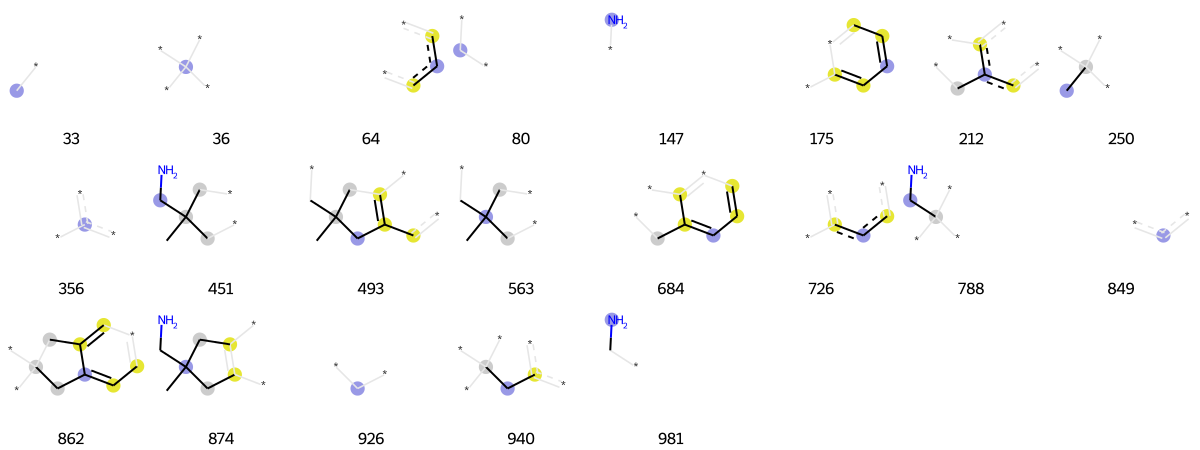

In [2007]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2008]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 64,
 80,
 90,
 121,
 136,
 143,
 175,
 294,
 314,
 356,
 360,
 378,
 389,
 430,
 455,
 504,
 537,
 585,
 650,
 672,
 674,
 700,
 721,
 726,
 736,
 771,
 774,
 779,
 794,
 802,
 813,
 820,
 831,
 849,
 860,
 890,
 935]

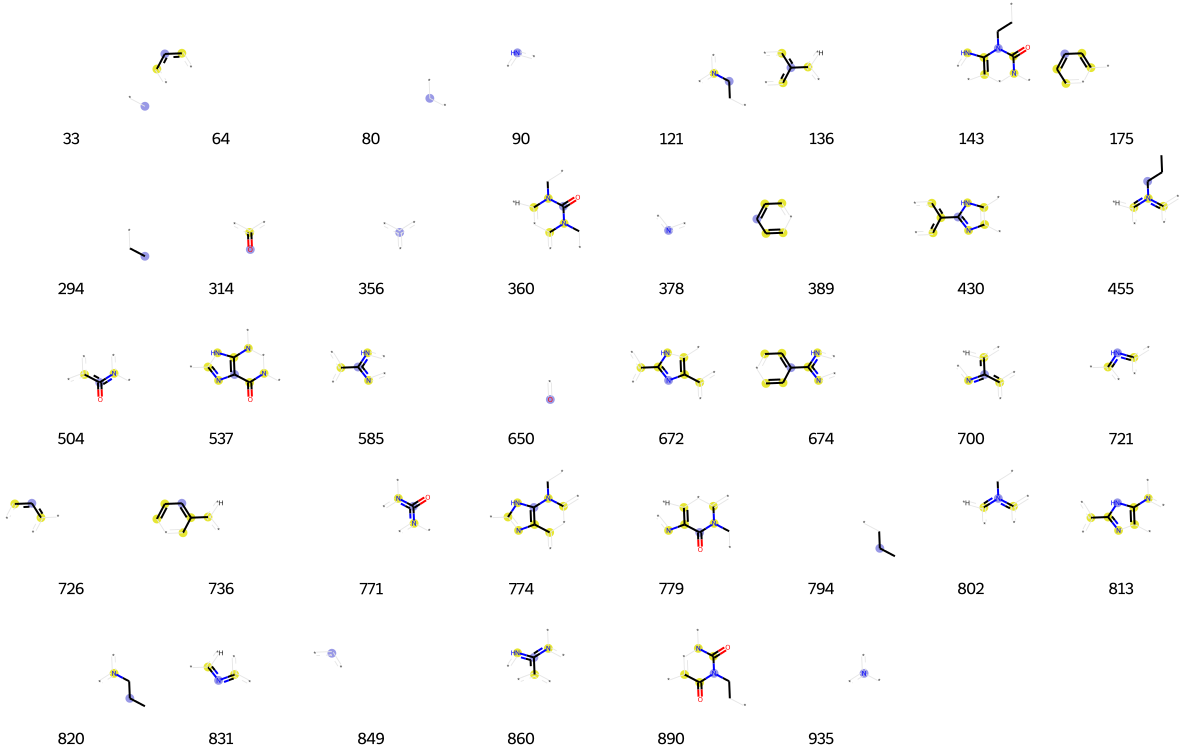

In [2009]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2010]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[136,
 209,
 222,
 237,
 289,
 304,
 314,
 333,
 352,
 356,
 381,
 384,
 465,
 472,
 525,
 578,
 650,
 656,
 690,
 709,
 726,
 745,
 754,
 784,
 807,
 849,
 875,
 896,
 941,
 1017]

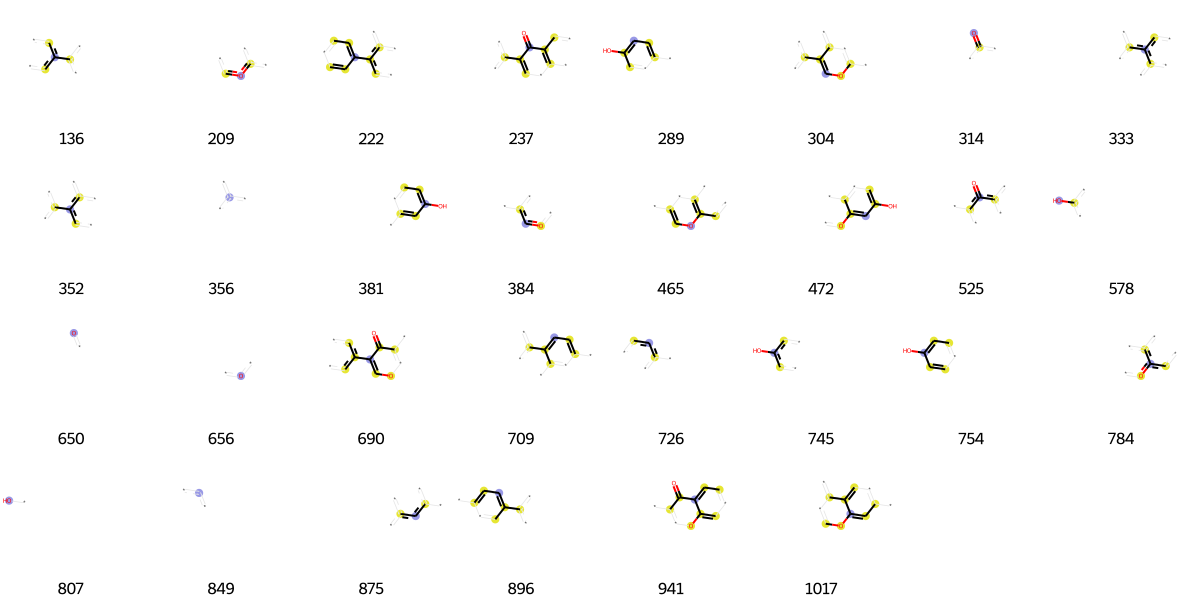

In [2011]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2012]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 5,
 77,
 80,
 90,
 142,
 166,
 192,
 227,
 233,
 255,
 263,
 289,
 314,
 338,
 341,
 356,
 386,
 578,
 605,
 646,
 650,
 699,
 726,
 739,
 745,
 754,
 772,
 779,
 795,
 801,
 807,
 829,
 832,
 843,
 849,
 872,
 898,
 904,
 935,
 956,
 968,
 1019]

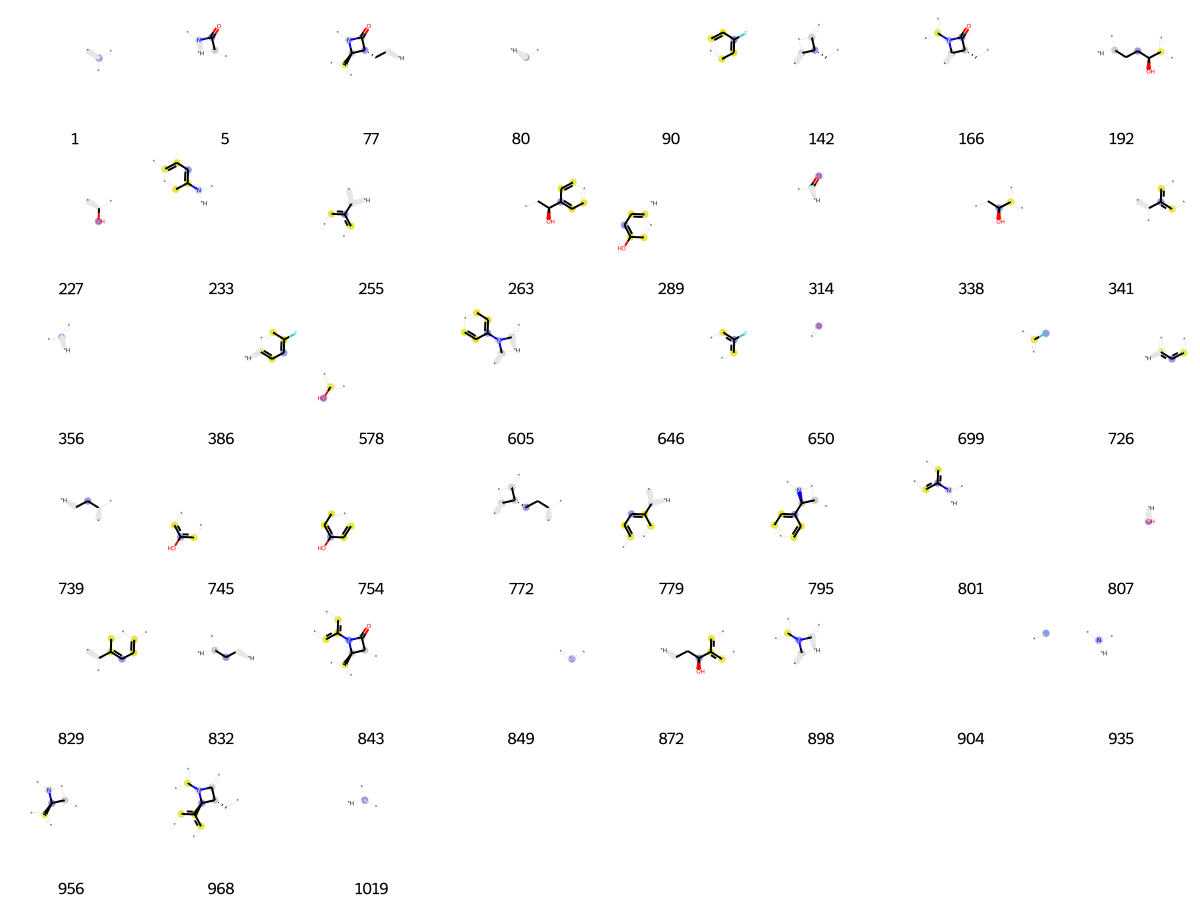

In [2013]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2014]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 15,
 33,
 64,
 69,
 80,
 114,
 128,
 150,
 184,
 191,
 201,
 214,
 231,
 237,
 262,
 271,
 285,
 294,
 322,
 356,
 361,
 386,
 407,
 419,
 428,
 429,
 456,
 477,
 486,
 526,
 562,
 650,
 673,
 680,
 695,
 703,
 726,
 771,
 792,
 807,
 809,
 849,
 875,
 891,
 893,
 904,
 926,
 935,
 954,
 974]

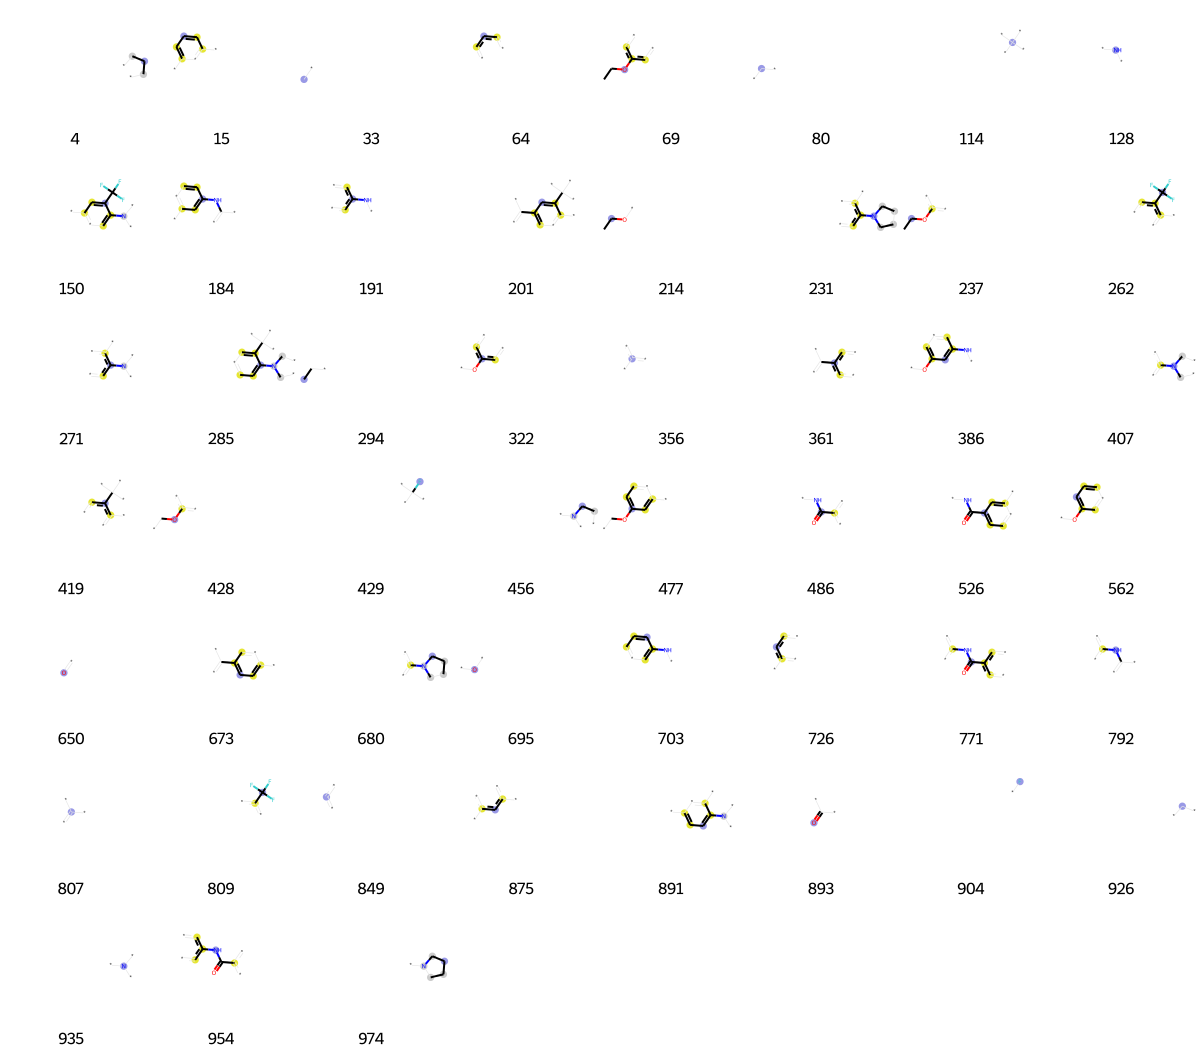

In [2015]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2016]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 36,
 45,
 74,
 80,
 90,
 121,
 139,
 142,
 158,
 161,
 171,
 209,
 223,
 297,
 322,
 323,
 324,
 352,
 354,
 356,
 378,
 492,
 512,
 544,
 622,
 650,
 652,
 654,
 693,
 695,
 715,
 716,
 718,
 726,
 753,
 781,
 838,
 841,
 849,
 864,
 875,
 881,
 887,
 921,
 927,
 932,
 935,
 939,
 946,
 948,
 949,
 955,
 958,
 960,
 992,
 997]

In [2017]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[13,
 15,
 33,
 64,
 80,
 116,
 227,
 294,
 315,
 328,
 333,
 356,
 386,
 414,
 419,
 428,
 494,
 501,
 547,
 695,
 726,
 787,
 795,
 849,
 882,
 913,
 946]

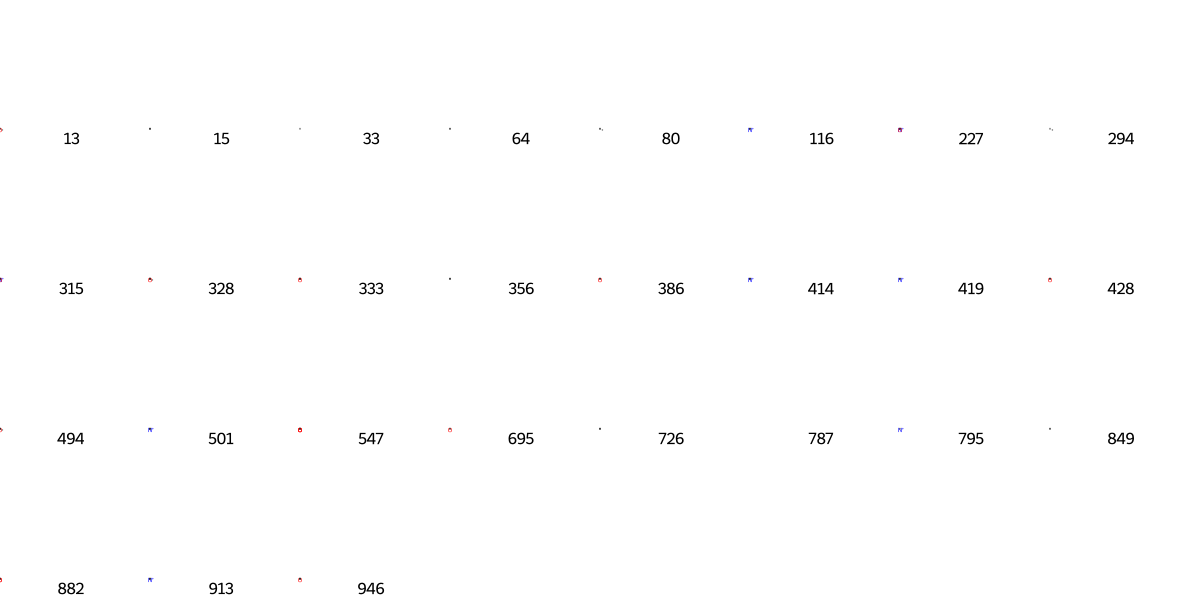

In [2018]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2019]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 5,
 15,
 19,
 24,
 33,
 39,
 43,
 64,
 80,
 117,
 157,
 202,
 231,
 283,
 292,
 323,
 325,
 350,
 356,
 378,
 386,
 428,
 448,
 472,
 515,
 571,
 573,
 578,
 583,
 596,
 599,
 650,
 656,
 668,
 676,
 694,
 695,
 726,
 745,
 807,
 842,
 849,
 930,
 935,
 946,
 975,
 1004,
 1005]

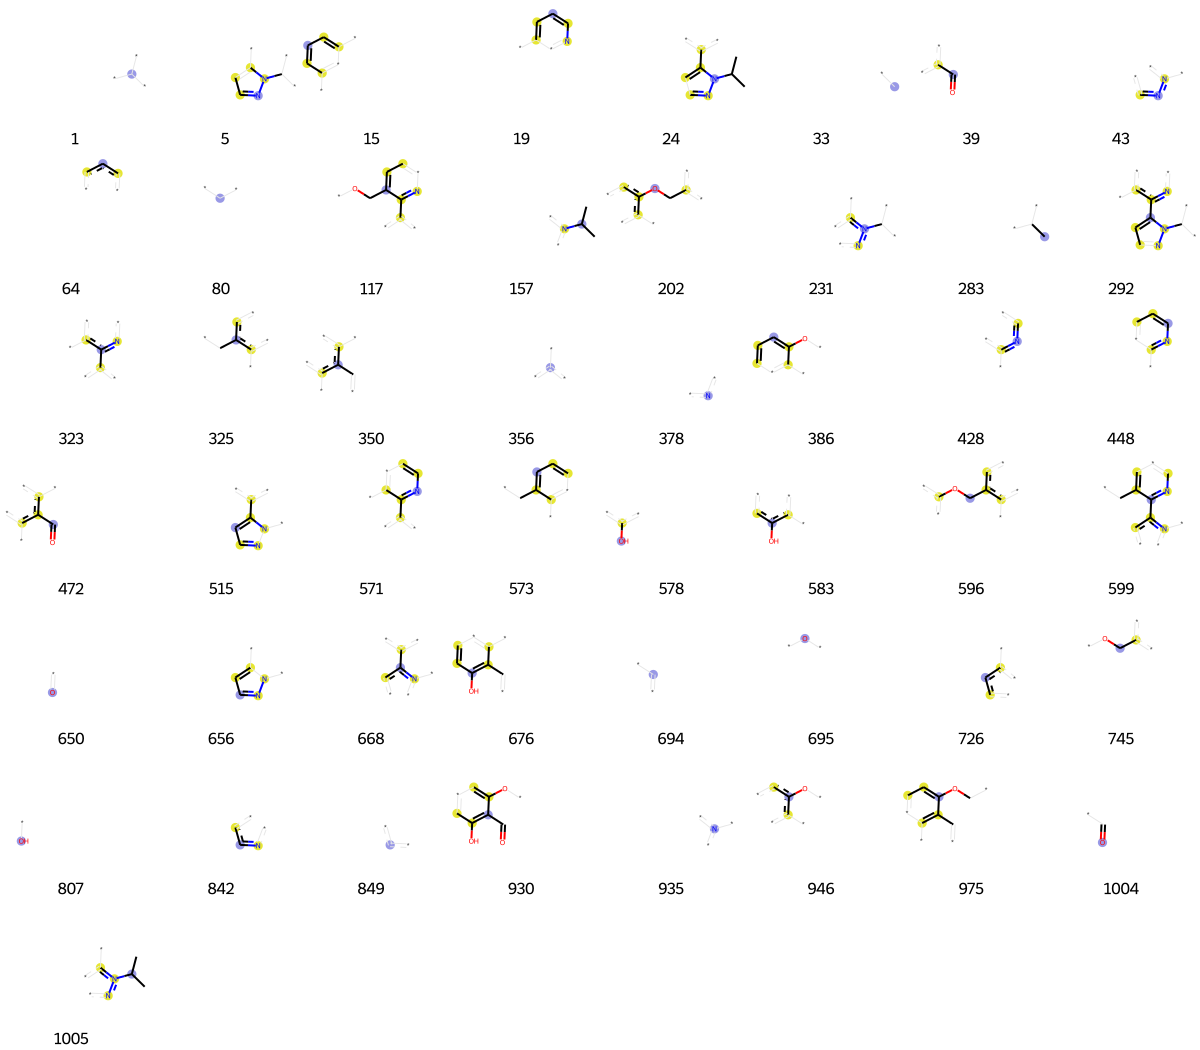

In [2020]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2021]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 13,
 21,
 42,
 64,
 74,
 80,
 121,
 175,
 219,
 302,
 316,
 341,
 356,
 389,
 430,
 456,
 458,
 514,
 533,
 557,
 653,
 695,
 726,
 730,
 741,
 767,
 819,
 849,
 887,
 908,
 926,
 935,
 978]

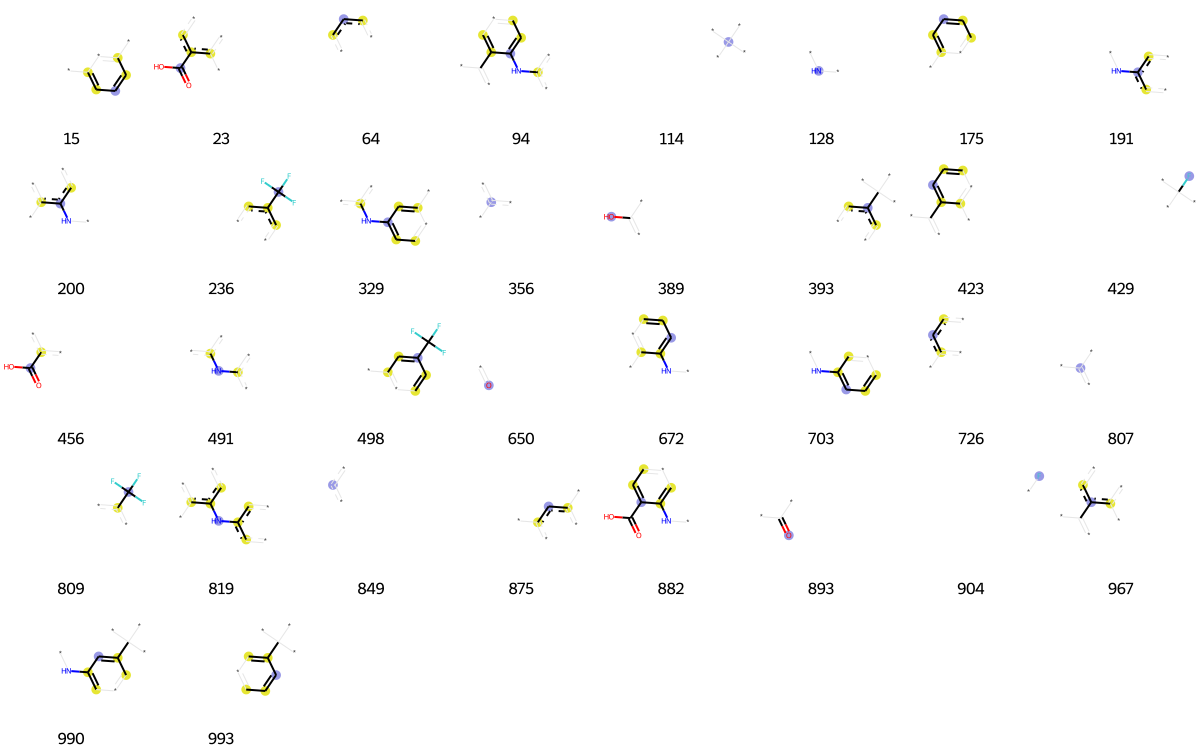

In [2022]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2023]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 60,
 64,
 70,
 80,
 101,
 114,
 121,
 129,
 134,
 222,
 236,
 237,
 249,
 255,
 283,
 285,
 314,
 325,
 352,
 356,
 369,
 393,
 429,
 455,
 498,
 512,
 590,
 598,
 608,
 621,
 641,
 650,
 656,
 680,
 695,
 699,
 724,
 726,
 735,
 741,
 750,
 751,
 771,
 780,
 809,
 816,
 834,
 841,
 849,
 875,
 883,
 903,
 904,
 935,
 937,
 946,
 970,
 990,
 1019]

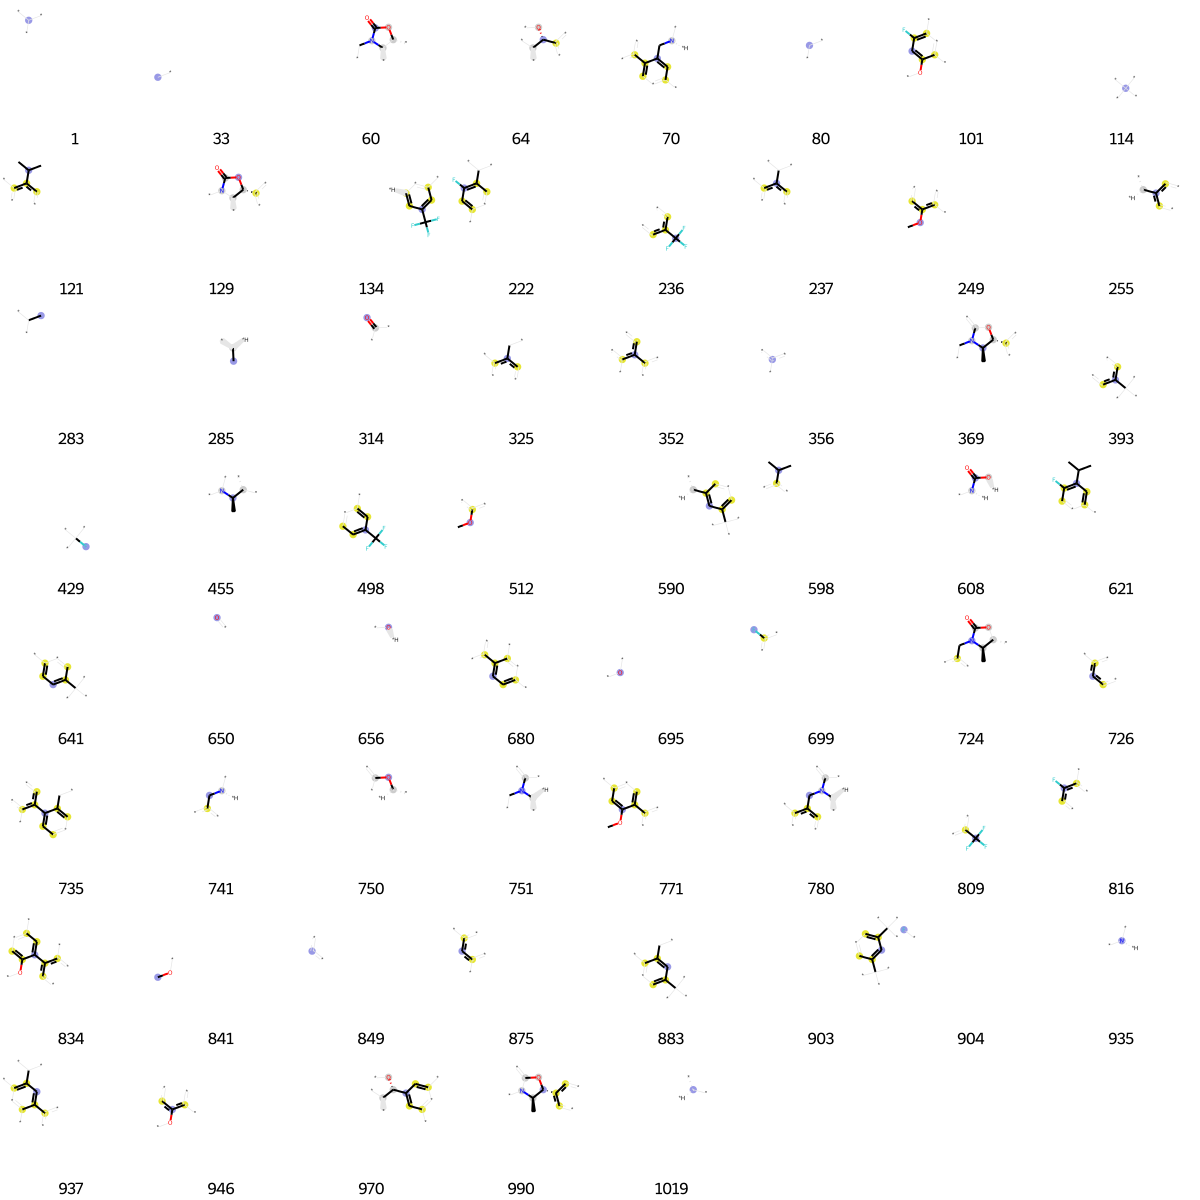

In [2024]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2025]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[13,
 33,
 62,
 80,
 128,
 139,
 145,
 147,
 191,
 274,
 294,
 356,
 361,
 392,
 498,
 514,
 568,
 591,
 606,
 644,
 650,
 652,
 667,
 673,
 693,
 695,
 726,
 794,
 807,
 843,
 849,
 881,
 887,
 893,
 895,
 904,
 927,
 948]

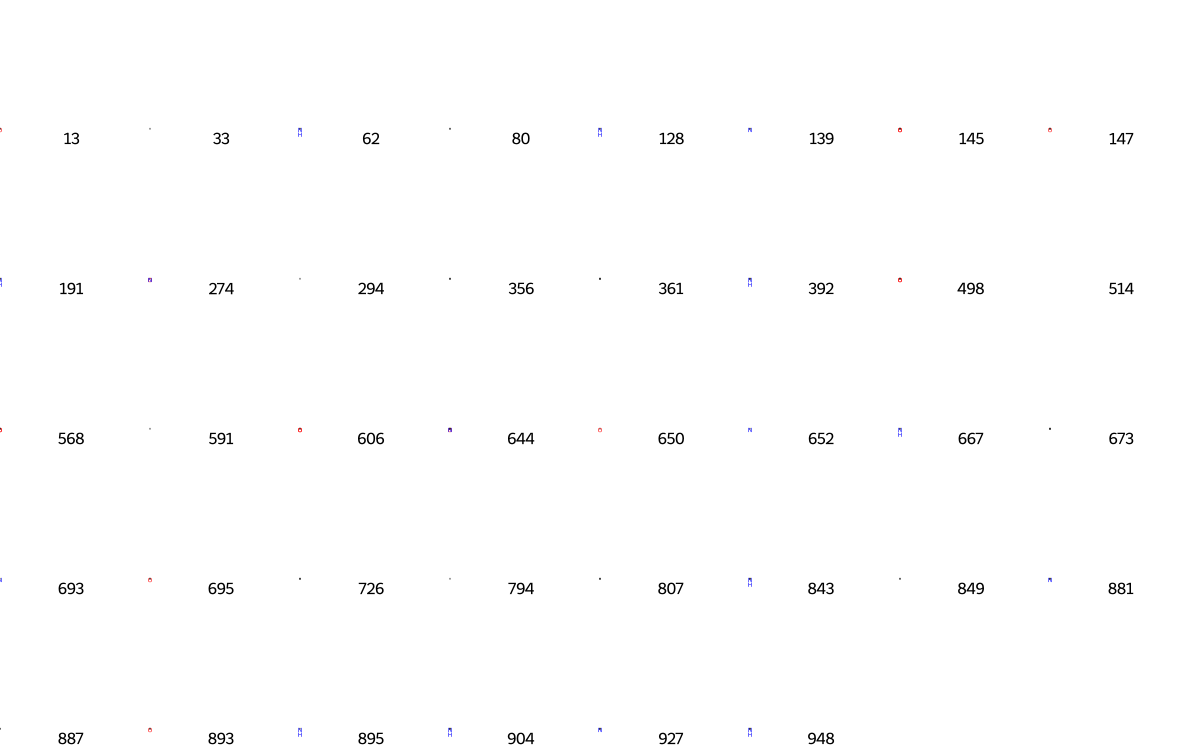

In [2026]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2027]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[10,
 13,
 33,
 80,
 147,
 319,
 336,
 362,
 399,
 414,
 428,
 540,
 628,
 650,
 677,
 695,
 807,
 842,
 893,
 913]

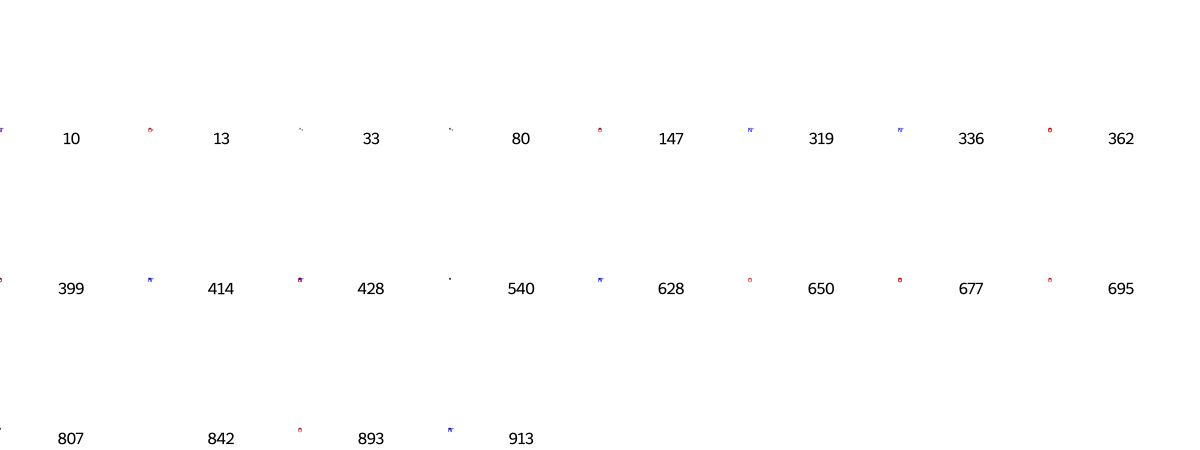

In [2028]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2029]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[2,
 4,
 50,
 64,
 97,
 128,
 140,
 147,
 162,
 175,
 191,
 248,
 251,
 301,
 309,
 345,
 356,
 378,
 385,
 389,
 490,
 491,
 500,
 536,
 650,
 664,
 675,
 689,
 703,
 726,
 785,
 792,
 807,
 831,
 849,
 864,
 890,
 893,
 913,
 926,
 974,
 1019]

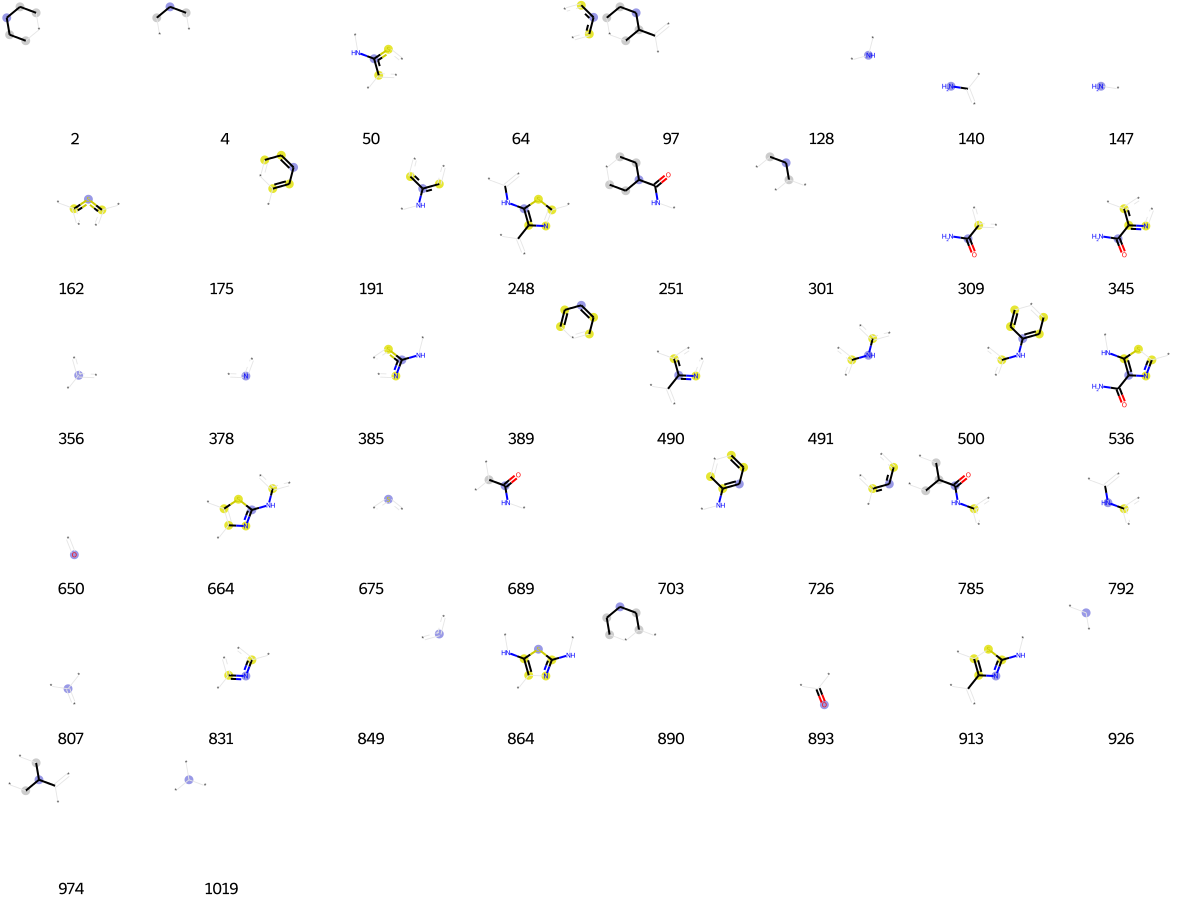

In [2030]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2031]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[33,
 36,
 57,
 75,
 80,
 84,
 98,
 127,
 130,
 138,
 182,
 184,
 242,
 253,
 292,
 294,
 301,
 314,
 327,
 345,
 356,
 364,
 408,
 436,
 455,
 519,
 529,
 534,
 559,
 622,
 649,
 650,
 674,
 714,
 717,
 748,
 798,
 807,
 841,
 849,
 884,
 909,
 915,
 926,
 928,
 974,
 1019]

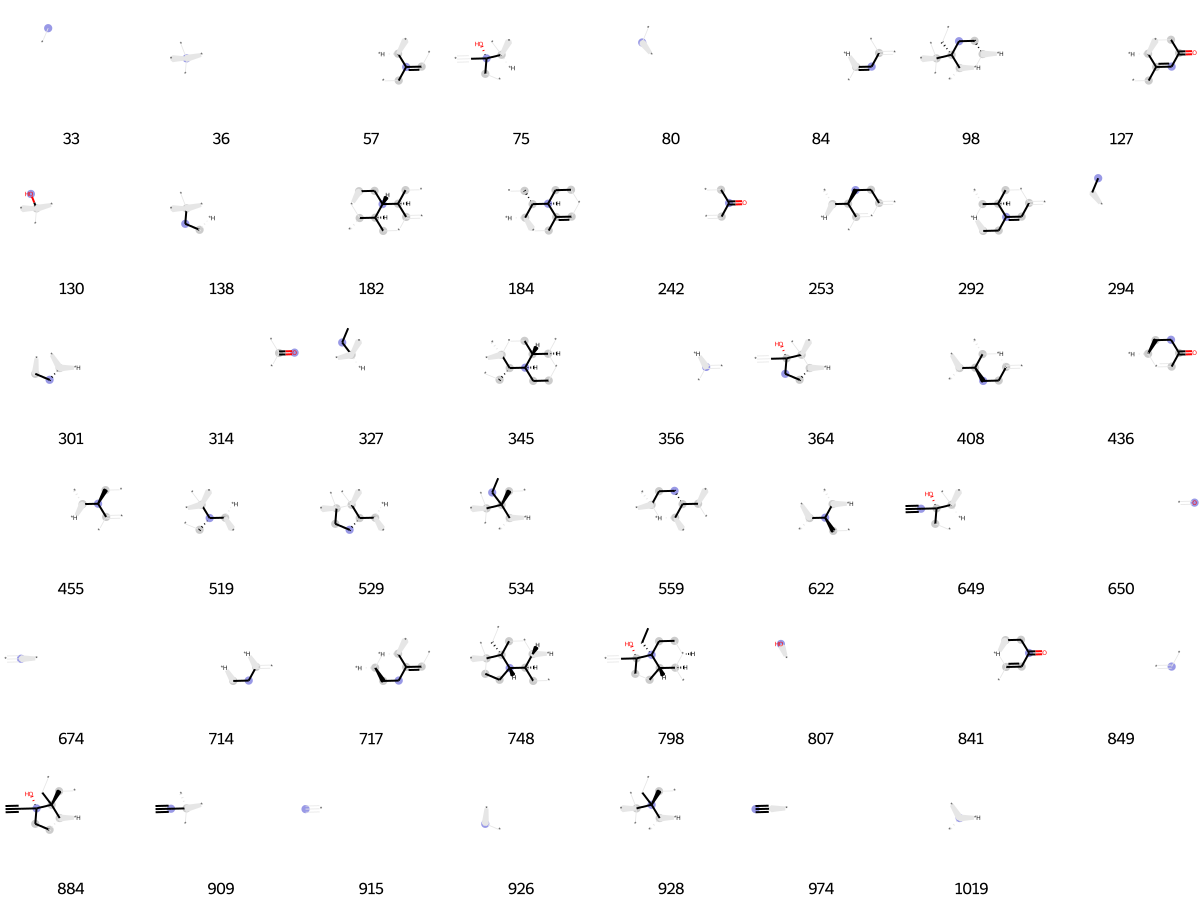

In [2032]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2033]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[11,
 17,
 22,
 32,
 33,
 36,
 46,
 80,
 84,
 96,
 147,
 162,
 170,
 233,
 250,
 251,
 268,
 314,
 356,
 403,
 412,
 424,
 493,
 519,
 547,
 593,
 628,
 639,
 650,
 655,
 656,
 676,
 679,
 695,
 703,
 706,
 748,
 750,
 753,
 760,
 767,
 781,
 786,
 787,
 804,
 807,
 835,
 836,
 846,
 849,
 893,
 904,
 905,
 910,
 926,
 951,
 960,
 967,
 973,
 980,
 997,
 1017,
 1019]

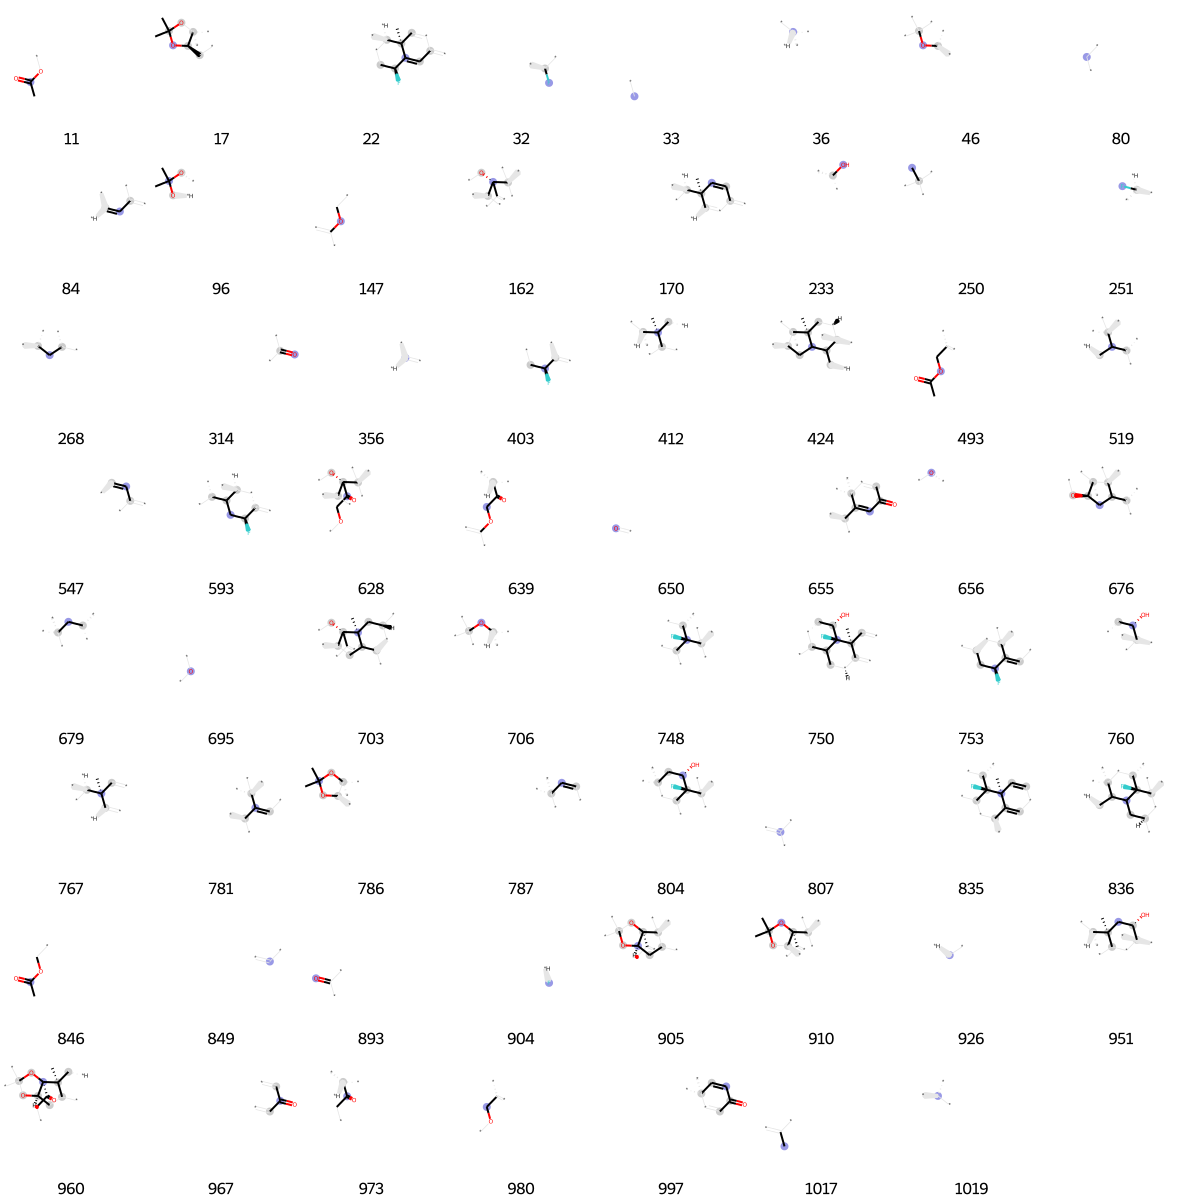

In [2034]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2035]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 33,
 64,
 80,
 102,
 115,
 118,
 128,
 175,
 220,
 227,
 267,
 283,
 289,
 322,
 341,
 348,
 356,
 389,
 421,
 428,
 465,
 514,
 562,
 578,
 695,
 726,
 745,
 754,
 782,
 803,
 807,
 829,
 849,
 886,
 979,
 994]

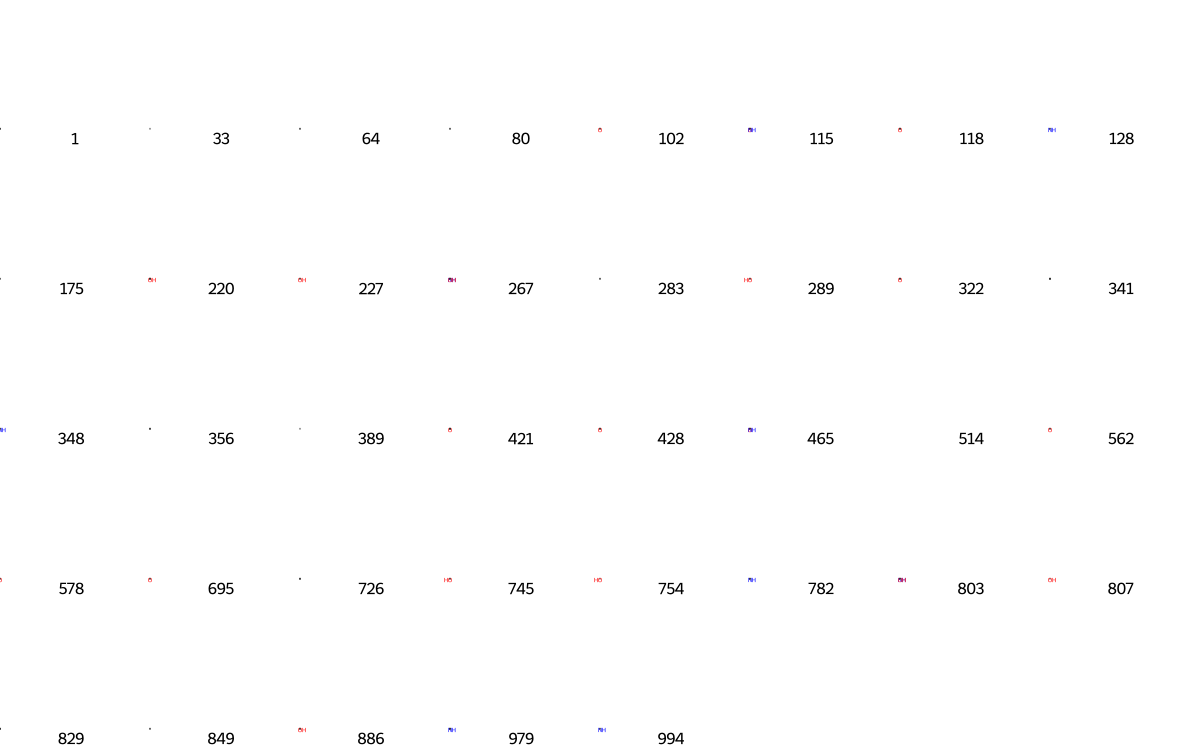

In [2036]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2037]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 84,
 157,
 255,
 314,
 354,
 356,
 516,
 644,
 650,
 656,
 667,
 691,
 698,
 747,
 786,
 807,
 849,
 856,
 893,
 901,
 941,
 965,
 1017,
 1019]

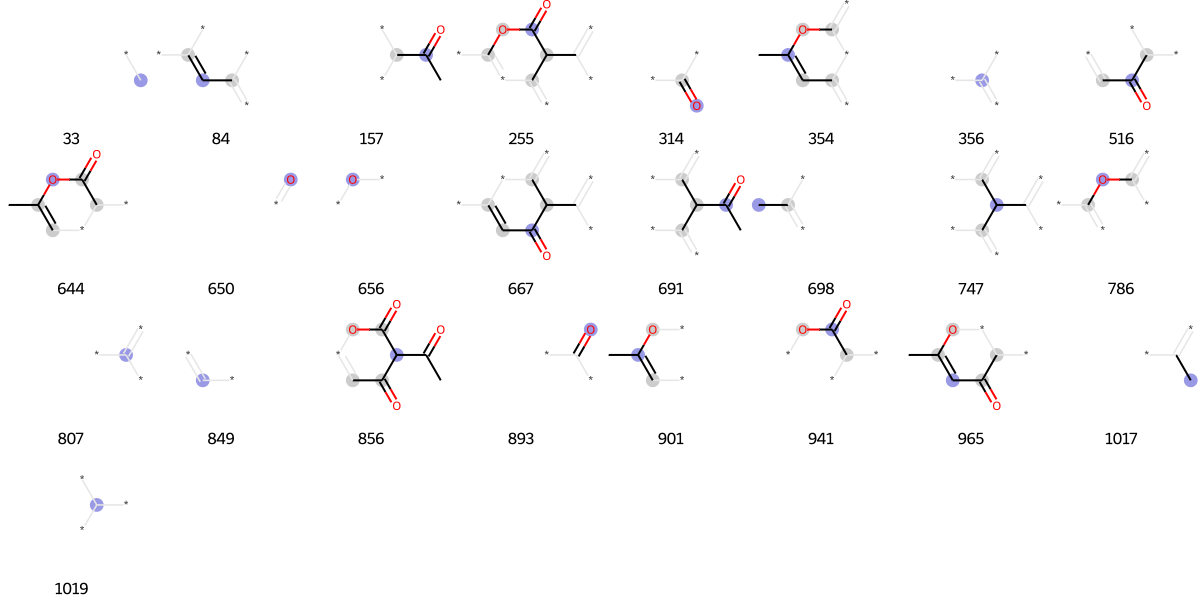

In [2038]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2039]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[3,
 8,
 21,
 42,
 59,
 104,
 146,
 169,
 206,
 216,
 238,
 300,
 345,
 356,
 389,
 407,
 488,
 561,
 570,
 581,
 585,
 598,
 622,
 650,
 659,
 684,
 723,
 739,
 776,
 807,
 816,
 826,
 849,
 875,
 882,
 886,
 893,
 926,
 935,
 981,
 1019]

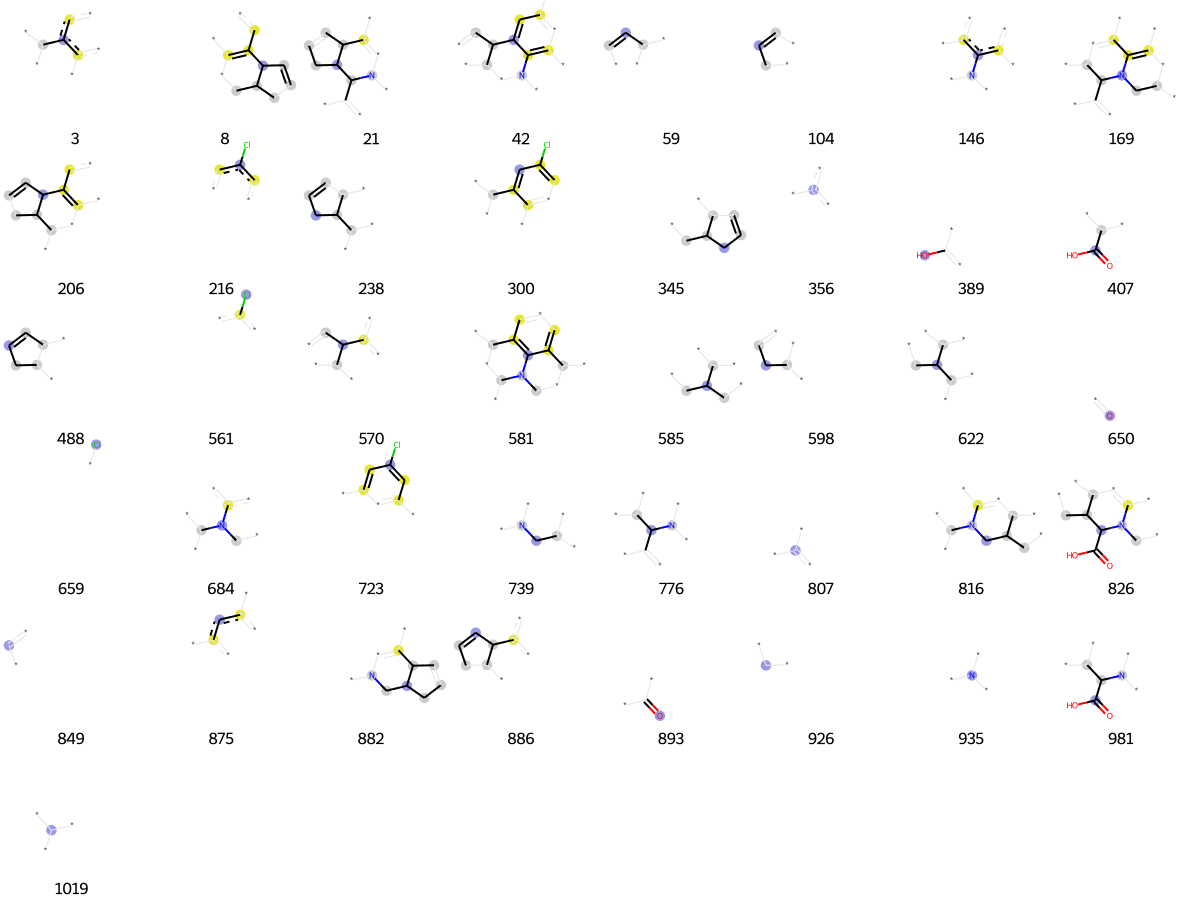

In [2040]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2041]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 41,
 43,
 64,
 80,
 128,
 143,
 179,
 197,
 209,
 213,
 224,
 233,
 235,
 255,
 288,
 314,
 333,
 338,
 351,
 356,
 378,
 400,
 416,
 428,
 431,
 442,
 444,
 474,
 494,
 504,
 511,
 622,
 650,
 656,
 672,
 698,
 726,
 787,
 799,
 801,
 804,
 807,
 828,
 849,
 893,
 896,
 902,
 910,
 932,
 935,
 966,
 977]

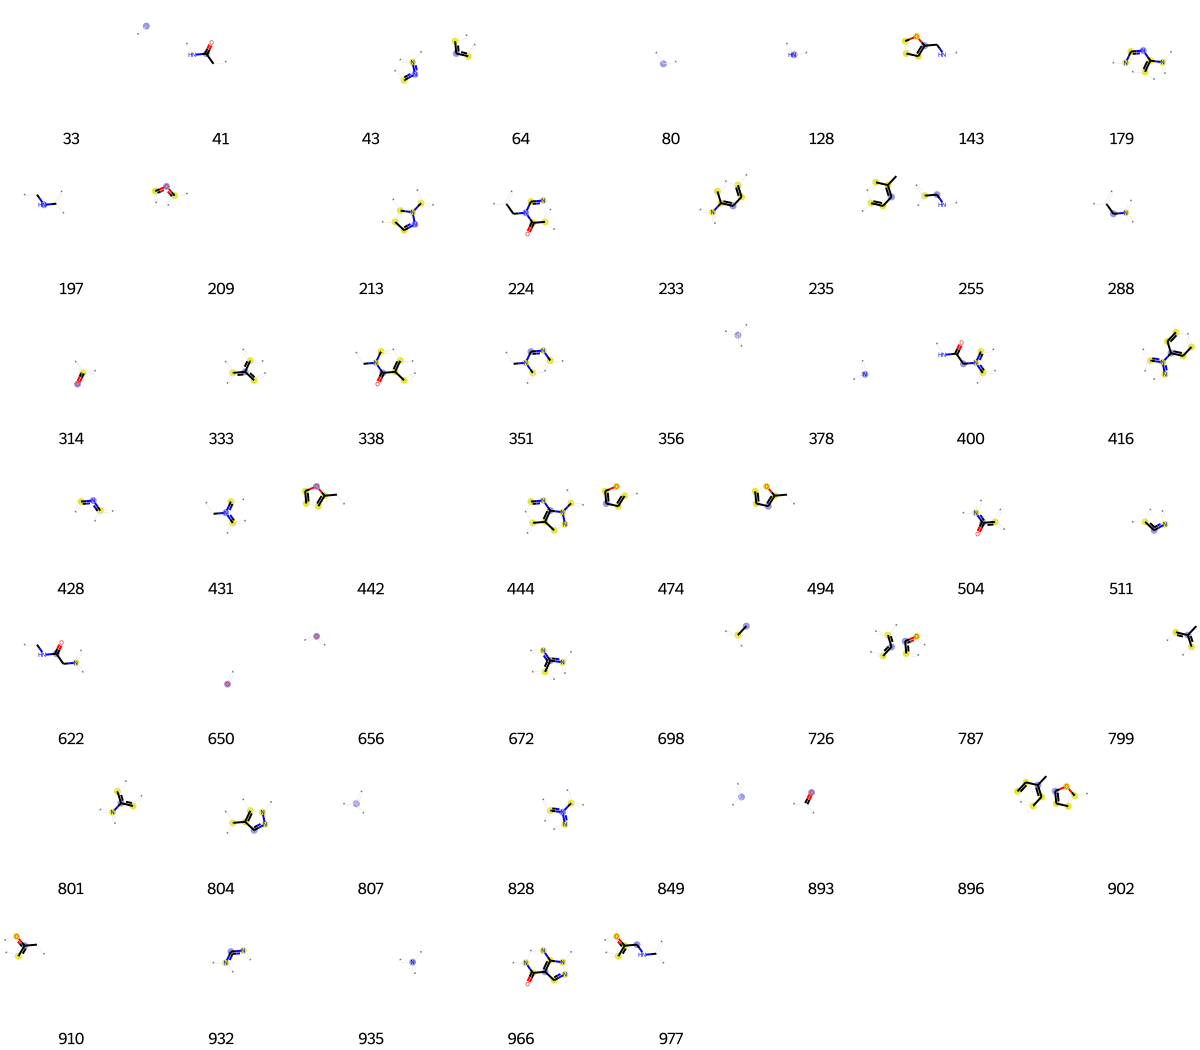

In [2042]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2043]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[136,
 209,
 237,
 289,
 304,
 314,
 315,
 323,
 333,
 352,
 356,
 381,
 384,
 451,
 465,
 472,
 525,
 578,
 583,
 589,
 650,
 656,
 690,
 709,
 726,
 745,
 784,
 807,
 849,
 875,
 896,
 941,
 964,
 1017]

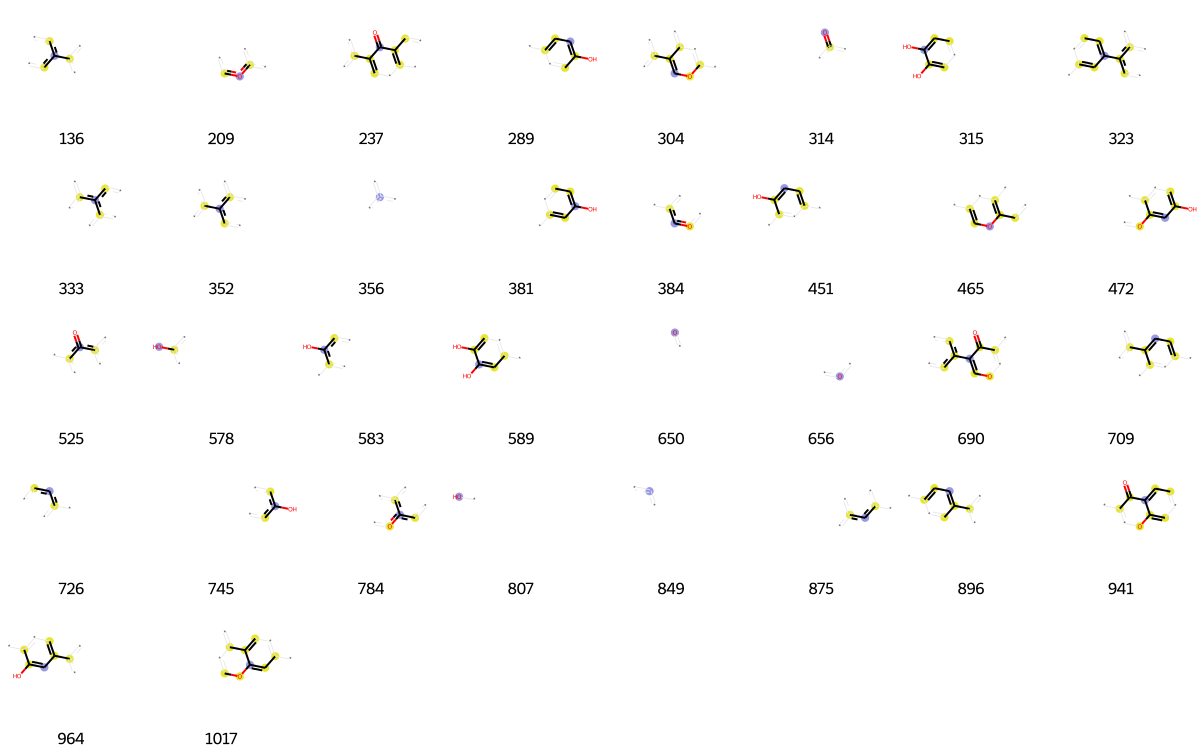

In [2044]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])